## Part 1: Digit recognition using CNNs 

In [184]:
#import necessary libaries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras.metrics import categorical_crossentropy, Accuracy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import cv2
import random
#import data modul for MNIST 
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split


In [3]:
#read data and prepaer for training 

(train_x, train_y), (x_test, y_test) = datasets.mnist.load_data()
val_x, test_x, val_y, test_y = train_test_split(x_test,y_test,test_size=0.50,random_state=42)
train_x = train_x[:,:,:,np.newaxis]
test_x = test_x[:,:,:,np.newaxis]
val_x = val_x[:,:,:,np.newaxis]
#categorilize
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)
val_y = to_categorical(val_y,10)
#normalization
train_x = train_x / 255.0
val_x = val_x / 255.0
test_x = test_x / 255.0
print("Train Size: ", len(train_x))
print("Test size: ",len(test_x))

Train Size:  60000
Test size:  5000


In [37]:
#define plotting function
def plot(histories):
    
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories.history['loss'], color='blue', label='train')
    plt.plot(histories.history['val_loss'], color='orange', label='test')

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories.history['accuracy'], color='blue', label='train')
    plt.plot(histories.history['val_accuracy'], color='orange', label='test')
    plt.show()
    print("Best accuracy in training: ", max(histories.history['accuracy']))
    

In [38]:
#create a model function that get input and number of class 
def create_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(128, (11, 11), strides=(4, 4), input_shape=input_shape, padding='valid',activation='relu'))
    model.add(BatchNormalization())
    #Layer 2
    model.add(Conv2D(256, (5, 5), padding='same',activation='relu'))
    model.add(BatchNormalization())
    #Layer 3
    model.add(Conv2D(256, (5, 5), padding='same',activation='relu'))
    model.add(BatchNormalization())
    #Layer 4
    model.add(Conv2D(512, (5, 5), padding='same',activation='relu'))
    model.add(BatchNormalization())
    #Layer 5
    model.add(Conv2D(512, (5, 5), padding='same',activation='relu'))
    model.add(BatchNormalization())
    #Layer 6
    model.add(Conv2D(512, (5, 5), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 7
    model.add(Conv2D(768, (5, 5), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Layer 8
    model.add(Conv2D(768, (3, 3), padding='same',activation='relu'))
    
    
    # Layer 9
    model.add(Conv2D(768, (3, 3), padding='same',activation='relu'))
   

    # Layer 10
    model.add(Conv2D(512, (3, 3), padding='same',activation='relu'))


    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(BatchNormalization())


    model.add(Dense(4096,activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(num_classes,activation='softmax'))

    opt = SGD(learning_rate=  0.01)
    model.compile(loss = categorical_crossentropy,
              optimizer = opt,
              metrics = ['accuracy'])

    model.summary()
    return model

In [39]:
#create a custom model which has a bit higher params than AlexNet
custom_model = create_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 5, 5, 128)         15616     
                                                                 
 batch_normalization_2 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 256)         819456    
                                                                 
 batch_normalization_3 (Batc  (None, 5, 5, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 256)         1638656   
                                                                 
 batch_normalization_4 (Batc  (None, 5, 5, 256)       

In [40]:
history = custom_model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size=8,epochs=10)

Epoch 1/10
7500/7500 [==============================] - 199s 26ms/step - loss: 1.0777 - accuracy: 0.8050 - val_loss: 0.2248 - val_accuracy: 0.9394
Epoch 2/10
7500/7500 [==============================] - 196s 26ms/step - loss: 0.2182 - accuracy: 0.9564 - val_loss: 0.0856 - val_accuracy: 0.9812
Epoch 3/10
7500/7500 [==============================] - 197s 26ms/step - loss: 0.1368 - accuracy: 0.9729 - val_loss: 0.1021 - val_accuracy: 0.9758
Epoch 4/10
7500/7500 [==============================] - 197s 26ms/step - loss: 0.1003 - accuracy: 0.9799 - val_loss: 0.0846 - val_accuracy: 0.9808
Epoch 5/10
7500/7500 [==============================] - 198s 26ms/step - loss: 0.0824 - accuracy: 0.9832 - val_loss: 0.1135 - val_accuracy: 0.9796
Epoch 6/10
7500/7500 [==============================] - 200s 27ms/step - loss: 0.0610 - accuracy: 0.9872 - val_loss: 0.1128 - val_accuracy: 0.9764
Epoch 7/10
7500/7500 [==============================] - 204s 27ms/step - loss: 0.0530 - accuracy: 0.9896 - val_loss: 0

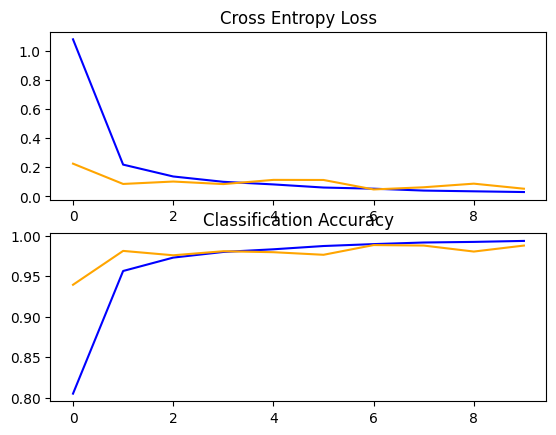

Best accuracy in training:  0.9935333132743835


In [42]:
plot(histories=history)

In [43]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(test_y,axis=1),np.argmax(custom_model.predict(test_x),axis=1), target_names=target_names))


157/157 [==============================] - 3s 13ms/step
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98       494
     Class 1       1.00      0.99      0.99       561
     Class 2       0.98      0.98      0.98       524
     Class 3       0.99      0.99      0.99       523
     Class 4       0.99      0.99      0.99       501
     Class 5       0.99      0.99      0.99       415
     Class 6       0.99      0.99      0.99       494
     Class 7       0.99      0.99      0.99       496
     Class 8       0.99      0.99      0.99       480
     Class 9       0.99      0.98      0.98       512

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



## Part 2: Input optimization for a CNN

In [44]:
#Load model from trained checkpoint
#custom_model.load_weights(r'mnist_data_model.pth')
custom_model.trainable = False # Set trainable params froze so while apply gradient, weights are not updated.
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 5, 5, 128)         15616     
                                                                 
 batch_normalization_2 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 256)         819456    
                                                                 
 batch_normalization_3 (Batc  (None, 5, 5, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 256)         1638656   
                                                                 
 batch_normalization_4 (Batc  (None, 5, 5, 256)       

In [177]:
target_label = np.array([0.,0.,1.,0.,0.,0.,0.,0.,0.,0.]).reshape(1,10)
random_image = np.random.randint(2, size=(1,28,28,1)).astype('float32')


In [178]:
random_image_copy = random_image.copy()

In [155]:
def maximaxe_input(random_image,target_label,num_iterations=500):
    output = custom_model.predict(random_image)
    modeloss = categorical_crossentropy(target_label,output)
    best_loss = modeloss
    x,y = random_image.shape[1],random_image.shape[2]
    for iter in range(num_iterations):
        for i in range(x):
            for j in range(y): 
                if random_image[:,i,j,:] == 1.0:
                    random_image[:,i,j,:] -= 1.0
                    new_out = custom_model(random_image)
                    new_loss = categorical_crossentropy(target_label,new_out)
                    if best_loss>new_loss:
                        best_loss = new_loss
                        continue
                    elif new_loss>=best_loss:
                        random_image[:,i,j,:] +=1.0
                elif random_image[:,i,j,:] == 0.0:
                    random_image[:,i,j,:] += 1.0
                    new_out = custom_model(random_image)
                    new_loss = categorical_crossentropy(target_label,new_out)
                    if best_loss>new_loss:
                        best_loss = new_loss
                        continue
                    elif new_loss>=best_loss:
                        random_image[:,i,j,:] -=1.0
                else:
                    print('there is a problem')
                    print(random_image[:,i,j,:])

        if iter % 50 == 0:
            plt.imshow(cv2.cvtColor(random_image.squeeze().astype('uint8')*255,cv2.COLOR_GRAY2RGB))
            plt.show()
        print(f'{iter} iteration loss is {best_loss}')
    return random_image



In [313]:
def minimize_error(input_data, target_output, num_iterations=700, learning_rate=0.01):
    input_data = tf.Variable(initial_value=tf.convert_to_tensor(input_data, dtype=tf.float32), trainable=True)
    target_output = tf.convert_to_tensor(target_output, dtype=tf.float32)

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            output = custom_model(input_data)
            loss = categorical_crossentropy(target_output, output)
            loss = tf.reduce_mean(loss)
            print(f'{i} iteration and loss {loss}')   
            if i%50 == 0:
                plt.imshow(input_data.numpy().squeeze())
                plt.show()

        gradients = tape.gradient(loss, input_data)
        optimizer.apply_gradients([(gradients, input_data)])
        input_data.assign(tf.clip_by_value(input_data,-1.0,1.0))

        

    final_output = input_data.numpy()
    return final_output

1/1 [==============================] - 0s 16ms/step


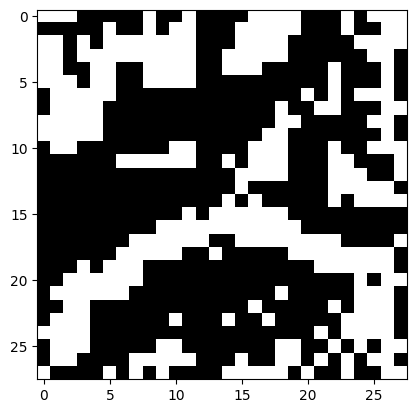

0 iteration loss is [0.00054071]
1 iteration loss is [0.00053868]
2 iteration loss is [0.00053868]
3 iteration loss is [0.00053868]
4 iteration loss is [0.00053868]
5 iteration loss is [0.00053868]
6 iteration loss is [0.00053868]
7 iteration loss is [0.00053868]
8 iteration loss is [0.00053868]
9 iteration loss is [0.00053868]
10 iteration loss is [0.00053868]
11 iteration loss is [0.00053868]
12 iteration loss is [0.00053868]
13 iteration loss is [0.00053868]
14 iteration loss is [0.00053868]
15 iteration loss is [0.00053868]
16 iteration loss is [0.00053868]
17 iteration loss is [0.00053868]
18 iteration loss is [0.00053868]
19 iteration loss is [0.00053868]
20 iteration loss is [0.00053868]
21 iteration loss is [0.00053868]
22 iteration loss is [0.00053868]
23 iteration loss is [0.00053868]
24 iteration loss is [0.00053868]
25 iteration loss is [0.00053868]
26 iteration loss is [0.00053868]
27 iteration loss is [0.00053868]
28 iteration loss is [0.00053868]
29 iteration loss is [0.

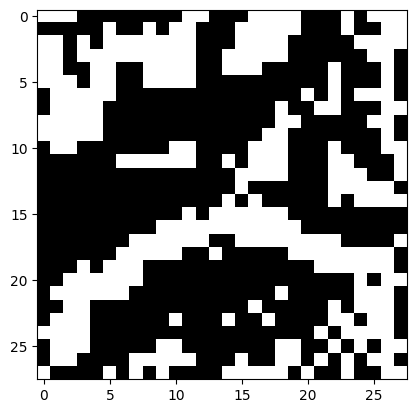

50 iteration loss is [0.00053868]
51 iteration loss is [0.00053868]
52 iteration loss is [0.00053868]
53 iteration loss is [0.00053868]
54 iteration loss is [0.00053868]
55 iteration loss is [0.00053868]
56 iteration loss is [0.00053868]
57 iteration loss is [0.00053868]
58 iteration loss is [0.00053868]
59 iteration loss is [0.00053868]
60 iteration loss is [0.00053868]
61 iteration loss is [0.00053868]
62 iteration loss is [0.00053868]
63 iteration loss is [0.00053868]
64 iteration loss is [0.00053868]
65 iteration loss is [0.00053868]
66 iteration loss is [0.00053868]
67 iteration loss is [0.00053868]
68 iteration loss is [0.00053868]
69 iteration loss is [0.00053868]
70 iteration loss is [0.00053868]
71 iteration loss is [0.00053868]
72 iteration loss is [0.00053868]
73 iteration loss is [0.00053868]
74 iteration loss is [0.00053868]
75 iteration loss is [0.00053868]
76 iteration loss is [0.00053868]
77 iteration loss is [0.00053868]
78 iteration loss is [0.00053868]
79 iteration l

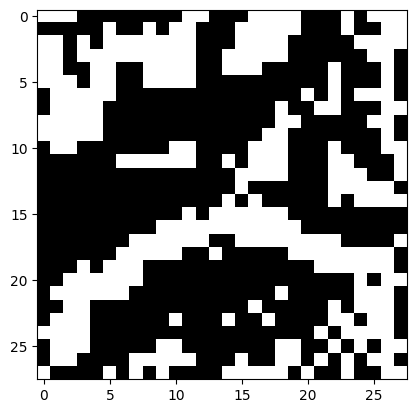

100 iteration loss is [0.00053868]
101 iteration loss is [0.00053868]
102 iteration loss is [0.00053868]
103 iteration loss is [0.00053868]
104 iteration loss is [0.00053868]
105 iteration loss is [0.00053868]
106 iteration loss is [0.00053868]
107 iteration loss is [0.00053868]
108 iteration loss is [0.00053868]
109 iteration loss is [0.00053868]
110 iteration loss is [0.00053868]
111 iteration loss is [0.00053868]
112 iteration loss is [0.00053868]
113 iteration loss is [0.00053868]
114 iteration loss is [0.00053868]
115 iteration loss is [0.00053868]
116 iteration loss is [0.00053868]
117 iteration loss is [0.00053868]
118 iteration loss is [0.00053868]
119 iteration loss is [0.00053868]
120 iteration loss is [0.00053868]
121 iteration loss is [0.00053868]
122 iteration loss is [0.00053868]
123 iteration loss is [0.00053868]
124 iteration loss is [0.00053868]
125 iteration loss is [0.00053868]
126 iteration loss is [0.00053868]
127 iteration loss is [0.00053868]
128 iteration loss i

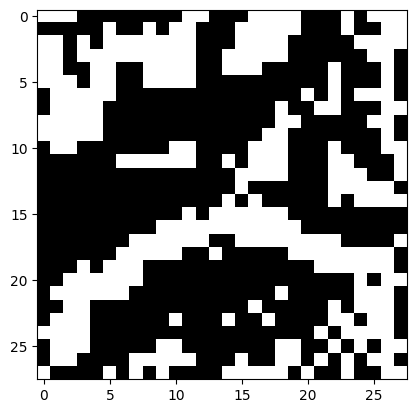

150 iteration loss is [0.00053868]
151 iteration loss is [0.00053868]
152 iteration loss is [0.00053868]
153 iteration loss is [0.00053868]
154 iteration loss is [0.00053868]
155 iteration loss is [0.00053868]
156 iteration loss is [0.00053868]
157 iteration loss is [0.00053868]
158 iteration loss is [0.00053868]
159 iteration loss is [0.00053868]
160 iteration loss is [0.00053868]
161 iteration loss is [0.00053868]
162 iteration loss is [0.00053868]
163 iteration loss is [0.00053868]
164 iteration loss is [0.00053868]
165 iteration loss is [0.00053868]
166 iteration loss is [0.00053868]
167 iteration loss is [0.00053868]
168 iteration loss is [0.00053868]
169 iteration loss is [0.00053868]
170 iteration loss is [0.00053868]
171 iteration loss is [0.00053868]
172 iteration loss is [0.00053868]
173 iteration loss is [0.00053868]
174 iteration loss is [0.00053868]
175 iteration loss is [0.00053868]
176 iteration loss is [0.00053868]
177 iteration loss is [0.00053868]
178 iteration loss i

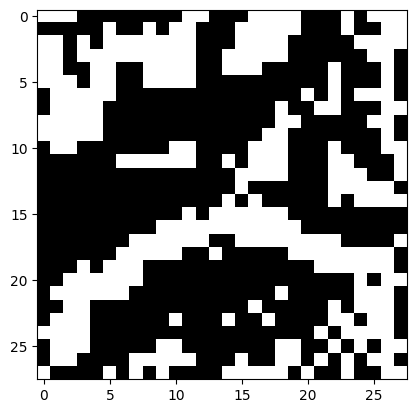

200 iteration loss is [0.00053868]
201 iteration loss is [0.00053868]
202 iteration loss is [0.00053868]
203 iteration loss is [0.00053868]
204 iteration loss is [0.00053868]
205 iteration loss is [0.00053868]
206 iteration loss is [0.00053868]
207 iteration loss is [0.00053868]
208 iteration loss is [0.00053868]
209 iteration loss is [0.00053868]
210 iteration loss is [0.00053868]
211 iteration loss is [0.00053868]
212 iteration loss is [0.00053868]
213 iteration loss is [0.00053868]
214 iteration loss is [0.00053868]
215 iteration loss is [0.00053868]
216 iteration loss is [0.00053868]
217 iteration loss is [0.00053868]
218 iteration loss is [0.00053868]
219 iteration loss is [0.00053868]
220 iteration loss is [0.00053868]
221 iteration loss is [0.00053868]
222 iteration loss is [0.00053868]
223 iteration loss is [0.00053868]
224 iteration loss is [0.00053868]
225 iteration loss is [0.00053868]
226 iteration loss is [0.00053868]
227 iteration loss is [0.00053868]
228 iteration loss i

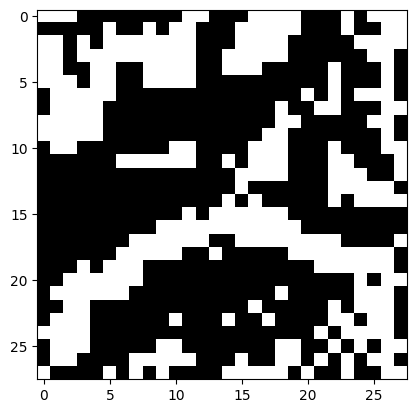

250 iteration loss is [0.00053868]
251 iteration loss is [0.00053868]
252 iteration loss is [0.00053868]
253 iteration loss is [0.00053868]
254 iteration loss is [0.00053868]
255 iteration loss is [0.00053868]
256 iteration loss is [0.00053868]
257 iteration loss is [0.00053868]
258 iteration loss is [0.00053868]
259 iteration loss is [0.00053868]
260 iteration loss is [0.00053868]
261 iteration loss is [0.00053868]
262 iteration loss is [0.00053868]
263 iteration loss is [0.00053868]
264 iteration loss is [0.00053868]
265 iteration loss is [0.00053868]
266 iteration loss is [0.00053868]
267 iteration loss is [0.00053868]
268 iteration loss is [0.00053868]
269 iteration loss is [0.00053868]
270 iteration loss is [0.00053868]
271 iteration loss is [0.00053868]
272 iteration loss is [0.00053868]
273 iteration loss is [0.00053868]
274 iteration loss is [0.00053868]
275 iteration loss is [0.00053868]
276 iteration loss is [0.00053868]
277 iteration loss is [0.00053868]
278 iteration loss i

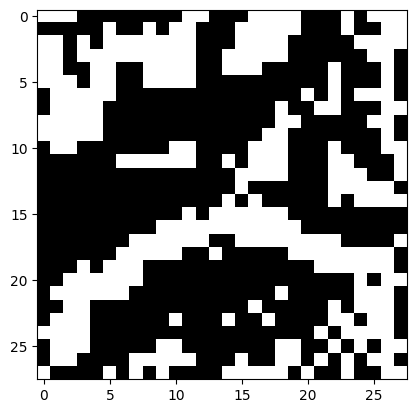

300 iteration loss is [0.00053868]
301 iteration loss is [0.00053868]
302 iteration loss is [0.00053868]
303 iteration loss is [0.00053868]
304 iteration loss is [0.00053868]
305 iteration loss is [0.00053868]
306 iteration loss is [0.00053868]
307 iteration loss is [0.00053868]
308 iteration loss is [0.00053868]
309 iteration loss is [0.00053868]
310 iteration loss is [0.00053868]
311 iteration loss is [0.00053868]
312 iteration loss is [0.00053868]
313 iteration loss is [0.00053868]
314 iteration loss is [0.00053868]
315 iteration loss is [0.00053868]
316 iteration loss is [0.00053868]
317 iteration loss is [0.00053868]
318 iteration loss is [0.00053868]
319 iteration loss is [0.00053868]
320 iteration loss is [0.00053868]
321 iteration loss is [0.00053868]
322 iteration loss is [0.00053868]
323 iteration loss is [0.00053868]
324 iteration loss is [0.00053868]
325 iteration loss is [0.00053868]
326 iteration loss is [0.00053868]
327 iteration loss is [0.00053868]
328 iteration loss i

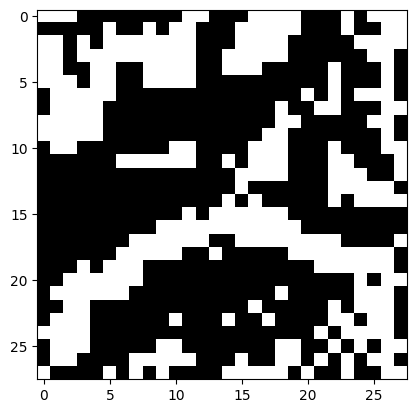

350 iteration loss is [0.00053868]
351 iteration loss is [0.00053868]
352 iteration loss is [0.00053868]
353 iteration loss is [0.00053868]
354 iteration loss is [0.00053868]
355 iteration loss is [0.00053868]
356 iteration loss is [0.00053868]
357 iteration loss is [0.00053868]
358 iteration loss is [0.00053868]
359 iteration loss is [0.00053868]
360 iteration loss is [0.00053868]
361 iteration loss is [0.00053868]
362 iteration loss is [0.00053868]
363 iteration loss is [0.00053868]
364 iteration loss is [0.00053868]
365 iteration loss is [0.00053868]
366 iteration loss is [0.00053868]
367 iteration loss is [0.00053868]
368 iteration loss is [0.00053868]
369 iteration loss is [0.00053868]
370 iteration loss is [0.00053868]
371 iteration loss is [0.00053868]
372 iteration loss is [0.00053868]
373 iteration loss is [0.00053868]
374 iteration loss is [0.00053868]
375 iteration loss is [0.00053868]
376 iteration loss is [0.00053868]
377 iteration loss is [0.00053868]
378 iteration loss i

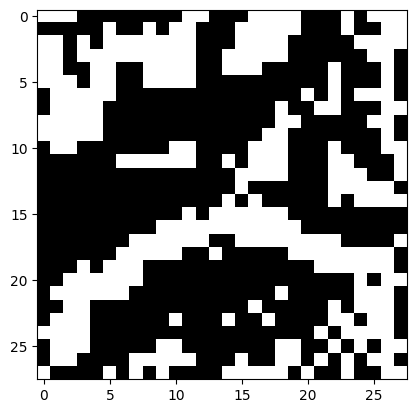

400 iteration loss is [0.00053868]
401 iteration loss is [0.00053868]
402 iteration loss is [0.00053868]
403 iteration loss is [0.00053868]
404 iteration loss is [0.00053868]
405 iteration loss is [0.00053868]
406 iteration loss is [0.00053868]
407 iteration loss is [0.00053868]
408 iteration loss is [0.00053868]
409 iteration loss is [0.00053868]
410 iteration loss is [0.00053868]
411 iteration loss is [0.00053868]
412 iteration loss is [0.00053868]
413 iteration loss is [0.00053868]
414 iteration loss is [0.00053868]
415 iteration loss is [0.00053868]
416 iteration loss is [0.00053868]
417 iteration loss is [0.00053868]
418 iteration loss is [0.00053868]
419 iteration loss is [0.00053868]
420 iteration loss is [0.00053868]
421 iteration loss is [0.00053868]
422 iteration loss is [0.00053868]
423 iteration loss is [0.00053868]
424 iteration loss is [0.00053868]
425 iteration loss is [0.00053868]
426 iteration loss is [0.00053868]
427 iteration loss is [0.00053868]
428 iteration loss i

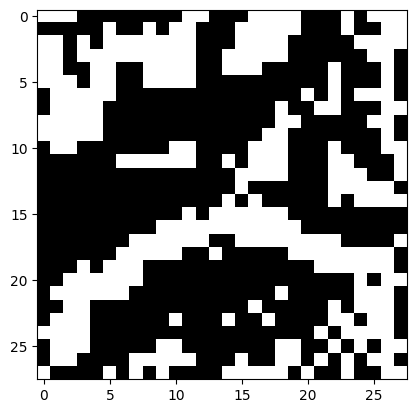

450 iteration loss is [0.00053868]
451 iteration loss is [0.00053868]
452 iteration loss is [0.00053868]
453 iteration loss is [0.00053868]
454 iteration loss is [0.00053868]
455 iteration loss is [0.00053868]
456 iteration loss is [0.00053868]
457 iteration loss is [0.00053868]
458 iteration loss is [0.00053868]
459 iteration loss is [0.00053868]
460 iteration loss is [0.00053868]
461 iteration loss is [0.00053868]
462 iteration loss is [0.00053868]
463 iteration loss is [0.00053868]
464 iteration loss is [0.00053868]
465 iteration loss is [0.00053868]
466 iteration loss is [0.00053868]
467 iteration loss is [0.00053868]
468 iteration loss is [0.00053868]
469 iteration loss is [0.00053868]
470 iteration loss is [0.00053868]
471 iteration loss is [0.00053868]
472 iteration loss is [0.00053868]
473 iteration loss is [0.00053868]
474 iteration loss is [0.00053868]
475 iteration loss is [0.00053868]
476 iteration loss is [0.00053868]
477 iteration loss is [0.00053868]
478 iteration loss i

In [156]:
pixel_output = maximaxe_input(random_image,target_label)

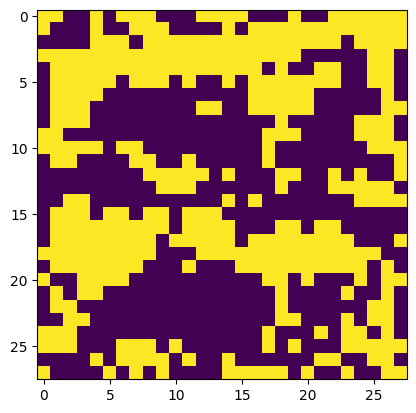

In [165]:
plt.imshow(random_image_copy.squeeze())
plt.show()

0 iteration and loss 8.804770469665527


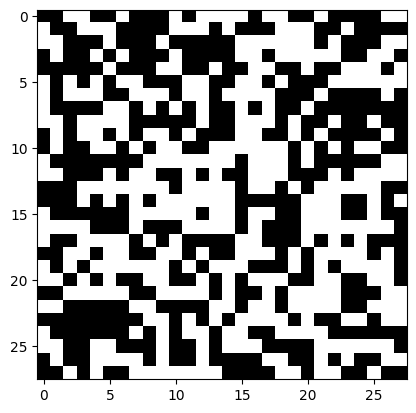

1 iteration and loss 8.799223899841309
2 iteration and loss 8.79278564453125
3 iteration and loss 8.783492088317871
4 iteration and loss 8.776927947998047
5 iteration and loss 8.768034934997559
6 iteration and loss 8.760472297668457
7 iteration and loss 8.75212574005127
8 iteration and loss 8.744454383850098
9 iteration and loss 8.73600959777832
10 iteration and loss 8.72706413269043
11 iteration and loss 8.71587085723877
12 iteration and loss 8.70666790008545
13 iteration and loss 8.696016311645508
14 iteration and loss 8.685602188110352
15 iteration and loss 8.675012588500977
16 iteration and loss 8.6646089553833
17 iteration and loss 8.653331756591797
18 iteration and loss 8.641886711120605
19 iteration and loss 8.630582809448242
20 iteration and loss 8.619412422180176
21 iteration and loss 8.607091903686523
22 iteration and loss 8.595071792602539
23 iteration and loss 8.581901550292969
24 iteration and loss 8.570660591125488
25 iteration and loss 8.557723045349121
26 iteration and 

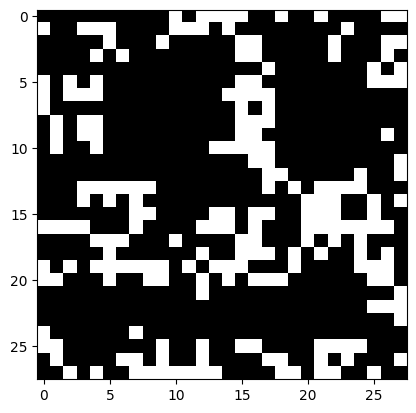

51 iteration and loss 8.135625839233398
52 iteration and loss 8.11197566986084
53 iteration and loss 8.090478897094727
54 iteration and loss 8.067770004272461
55 iteration and loss 8.046553611755371
56 iteration and loss 8.023275375366211
57 iteration and loss 8.00157642364502
58 iteration and loss 7.9777913093566895
59 iteration and loss 7.95453405380249
60 iteration and loss 7.929791450500488
61 iteration and loss 7.90612268447876
62 iteration and loss 7.882265567779541
63 iteration and loss 7.858046054840088
64 iteration and loss 7.834079742431641
65 iteration and loss 7.80891752243042
66 iteration and loss 7.784343719482422
67 iteration and loss 7.760916709899902
68 iteration and loss 7.734285831451416
69 iteration and loss 7.70977783203125
70 iteration and loss 7.684417247772217
71 iteration and loss 7.658688068389893
72 iteration and loss 7.633066654205322
73 iteration and loss 7.605592727661133
74 iteration and loss 7.576969623565674
75 iteration and loss 7.549384593963623
76 it

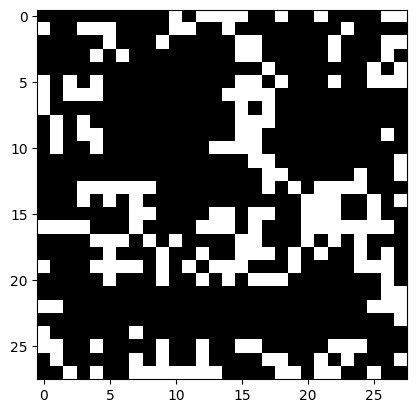

101 iteration and loss 6.740585803985596
102 iteration and loss 6.707499027252197
103 iteration and loss 6.672708988189697
104 iteration and loss 6.636904239654541
105 iteration and loss 6.602745056152344
106 iteration and loss 6.567094326019287
107 iteration and loss 6.53294038772583
108 iteration and loss 6.498464584350586
109 iteration and loss 6.464365005493164
110 iteration and loss 6.430421829223633
111 iteration and loss 6.396403789520264
112 iteration and loss 6.363824367523193
113 iteration and loss 6.330354690551758
114 iteration and loss 6.295079231262207
115 iteration and loss 6.258758544921875
116 iteration and loss 6.221972465515137
117 iteration and loss 6.1837286949157715
118 iteration and loss 6.145822048187256
119 iteration and loss 6.109197616577148
120 iteration and loss 6.0702290534973145
121 iteration and loss 6.030817985534668
122 iteration and loss 5.991753101348877
123 iteration and loss 5.951575756072998
124 iteration and loss 5.91397762298584
125 iteration an

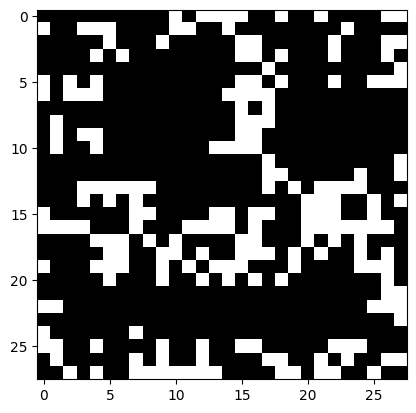

151 iteration and loss 4.984675407409668
152 iteration and loss 4.954216480255127
153 iteration and loss 4.9239630699157715
154 iteration and loss 4.893584728240967
155 iteration and loss 4.8619914054870605
156 iteration and loss 4.830721378326416
157 iteration and loss 4.797980785369873
158 iteration and loss 4.767432689666748
159 iteration and loss 4.737334251403809
160 iteration and loss 4.707655429840088
161 iteration and loss 4.677250862121582
162 iteration and loss 4.6499552726745605
163 iteration and loss 4.6214494705200195
164 iteration and loss 4.595405578613281
165 iteration and loss 4.572165012359619
166 iteration and loss 4.54769229888916
167 iteration and loss 4.524207592010498
168 iteration and loss 4.500467777252197
169 iteration and loss 4.4767632484436035
170 iteration and loss 4.453236103057861
171 iteration and loss 4.4306745529174805
172 iteration and loss 4.408074855804443
173 iteration and loss 4.3867387771606445
174 iteration and loss 4.365016937255859
175 iterat

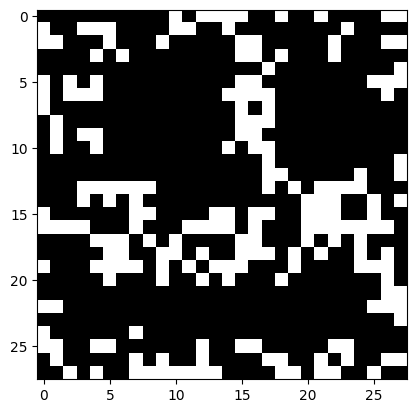

201 iteration and loss 3.862820625305176
202 iteration and loss 3.8452906608581543
203 iteration and loss 3.826569080352783
204 iteration and loss 3.8084540367126465
205 iteration and loss 3.790909767150879
206 iteration and loss 3.772657871246338
207 iteration and loss 3.7536113262176514
208 iteration and loss 3.735581636428833
209 iteration and loss 3.7187509536743164
210 iteration and loss 3.701613426208496
211 iteration and loss 3.6840529441833496
212 iteration and loss 3.6671297550201416
213 iteration and loss 3.6491858959198
214 iteration and loss 3.6319398880004883
215 iteration and loss 3.613149404525757
216 iteration and loss 3.5958049297332764
217 iteration and loss 3.57889723777771
218 iteration and loss 3.5633883476257324
219 iteration and loss 3.547372579574585
220 iteration and loss 3.5312082767486572
221 iteration and loss 3.5166738033294678
222 iteration and loss 3.5007736682891846
223 iteration and loss 3.4846365451812744
224 iteration and loss 3.4695398807525635
225 i

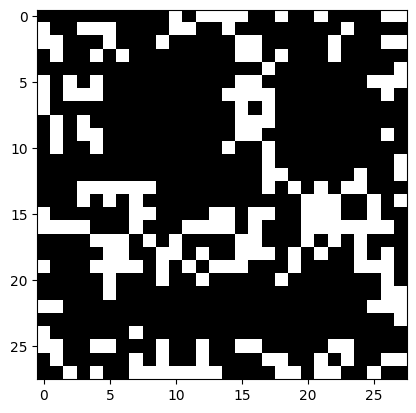

251 iteration and loss 3.009671926498413
252 iteration and loss 2.993103265762329
253 iteration and loss 2.9765329360961914
254 iteration and loss 2.961264133453369
255 iteration and loss 2.9428248405456543
256 iteration and loss 2.9262731075286865
257 iteration and loss 2.908444881439209
258 iteration and loss 2.891040802001953
259 iteration and loss 2.8727259635925293
260 iteration and loss 2.853343963623047
261 iteration and loss 2.8346381187438965
262 iteration and loss 2.8133304119110107
263 iteration and loss 2.7929115295410156
264 iteration and loss 2.771331787109375
265 iteration and loss 2.750645399093628
266 iteration and loss 2.730654716491699
267 iteration and loss 2.7096219062805176
268 iteration and loss 2.687708854675293
269 iteration and loss 2.6683506965637207
270 iteration and loss 2.6465840339660645
271 iteration and loss 2.6255362033843994
272 iteration and loss 2.6049320697784424
273 iteration and loss 2.583495616912842
274 iteration and loss 2.563591957092285
275 

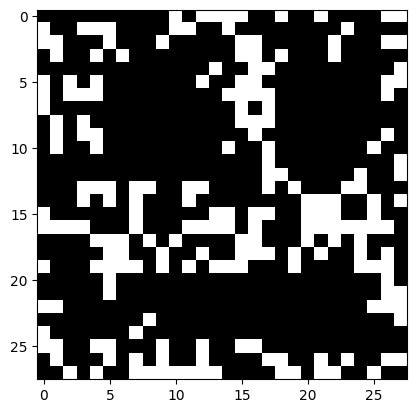

301 iteration and loss 1.8782199621200562
302 iteration and loss 1.8531869649887085
303 iteration and loss 1.829131841659546
304 iteration and loss 1.8035461902618408
305 iteration and loss 1.7775007486343384
306 iteration and loss 1.7513132095336914
307 iteration and loss 1.7258530855178833
308 iteration and loss 1.6996805667877197
309 iteration and loss 1.674613356590271
310 iteration and loss 1.648813247680664
311 iteration and loss 1.62272310256958
312 iteration and loss 1.5969948768615723
313 iteration and loss 1.5714411735534668
314 iteration and loss 1.5466923713684082
315 iteration and loss 1.5209311246871948
316 iteration and loss 1.496678113937378
317 iteration and loss 1.472156286239624
318 iteration and loss 1.4477994441986084
319 iteration and loss 1.4242585897445679
320 iteration and loss 1.401073694229126
321 iteration and loss 1.3788135051727295
322 iteration and loss 1.3558753728866577
323 iteration and loss 1.333889365196228
324 iteration and loss 1.3112061023712158
3

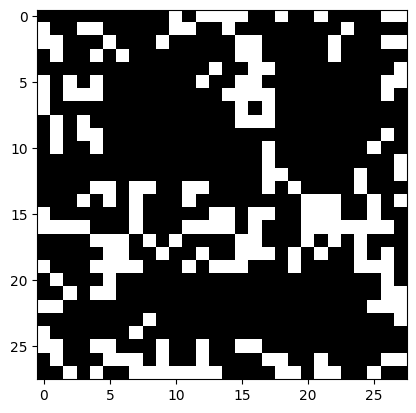

351 iteration and loss 0.8179335594177246
352 iteration and loss 0.8010416030883789
353 iteration and loss 0.7856208682060242
354 iteration and loss 0.7705861926078796
355 iteration and loss 0.7552601099014282
356 iteration and loss 0.7399160861968994
357 iteration and loss 0.7250958681106567
358 iteration and loss 0.7103167176246643
359 iteration and loss 0.6976977586746216
360 iteration and loss 0.6846731305122375
361 iteration and loss 0.672080934047699
362 iteration and loss 0.6595035195350647
363 iteration and loss 0.6486809849739075
364 iteration and loss 0.6371780633926392
365 iteration and loss 0.6260932683944702
366 iteration and loss 0.6155596971511841
367 iteration and loss 0.6052993535995483
368 iteration and loss 0.5952829718589783
369 iteration and loss 0.5855939388275146
370 iteration and loss 0.5759864449501038
371 iteration and loss 0.5653985738754272
372 iteration and loss 0.5556876063346863
373 iteration and loss 0.54569411277771
374 iteration and loss 0.536204576492

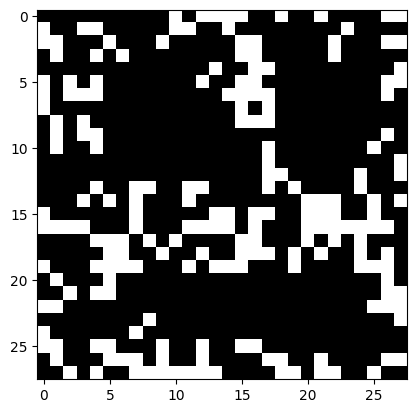

401 iteration and loss 0.35031166672706604
402 iteration and loss 0.34591156244277954
403 iteration and loss 0.3411683142185211
404 iteration and loss 0.3366861045360565
405 iteration and loss 0.3326444923877716
406 iteration and loss 0.32799914479255676
407 iteration and loss 0.32389143109321594
408 iteration and loss 0.3202524781227112
409 iteration and loss 0.31612563133239746
410 iteration and loss 0.31229904294013977
411 iteration and loss 0.3086404502391815
412 iteration and loss 0.3050512671470642
413 iteration and loss 0.30118829011917114
414 iteration and loss 0.2971821129322052
415 iteration and loss 0.29407602548599243
416 iteration and loss 0.29040172696113586
417 iteration and loss 0.28684625029563904
418 iteration and loss 0.28346940875053406
419 iteration and loss 0.2805619239807129
420 iteration and loss 0.27646583318710327
421 iteration and loss 0.2729719579219818
422 iteration and loss 0.26916202902793884
423 iteration and loss 0.2656840980052948
424 iteration and los

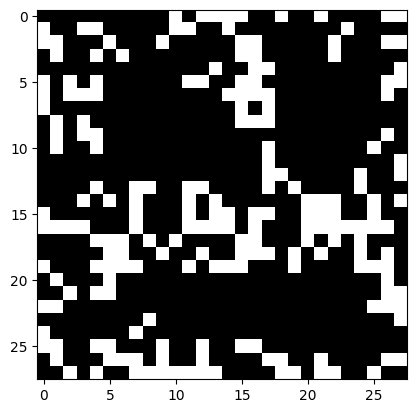

451 iteration and loss 0.1926783323287964
452 iteration and loss 0.19073379039764404
453 iteration and loss 0.1887991726398468
454 iteration and loss 0.18706874549388885
455 iteration and loss 0.18529611825942993
456 iteration and loss 0.18393360078334808
457 iteration and loss 0.1821918487548828
458 iteration and loss 0.18081016838550568
459 iteration and loss 0.17903147637844086
460 iteration and loss 0.17753833532333374
461 iteration and loss 0.1762135773897171
462 iteration and loss 0.17472101747989655
463 iteration and loss 0.17325027287006378
464 iteration and loss 0.17187796533107758
465 iteration and loss 0.17058035731315613
466 iteration and loss 0.16931478679180145
467 iteration and loss 0.16786228120326996
468 iteration and loss 0.1663312464952469
469 iteration and loss 0.16495709121227264
470 iteration and loss 0.16342595219612122
471 iteration and loss 0.16225913166999817
472 iteration and loss 0.1609971821308136
473 iteration and loss 0.15950427949428558
474 iteration and

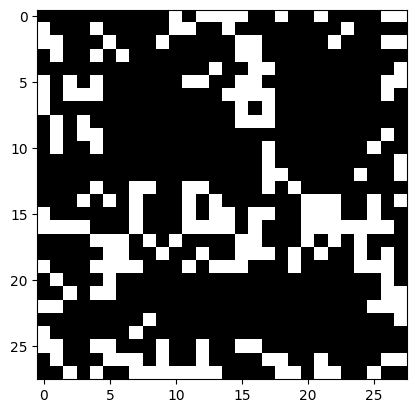

501 iteration and loss 0.12851962447166443
502 iteration and loss 0.12780976295471191
503 iteration and loss 0.12701456248760223
504 iteration and loss 0.12596379220485687
505 iteration and loss 0.12502828240394592
506 iteration and loss 0.1242743507027626
507 iteration and loss 0.12347086519002914
508 iteration and loss 0.12279389053583145
509 iteration and loss 0.12183819711208344
510 iteration and loss 0.12112980335950851
511 iteration and loss 0.12031194567680359
512 iteration and loss 0.11947935074567795
513 iteration and loss 0.11861831694841385
514 iteration and loss 0.1178794577717781
515 iteration and loss 0.11712213605642319
516 iteration and loss 0.11649972945451736
517 iteration and loss 0.11568890511989594
518 iteration and loss 0.11489751189947128
519 iteration and loss 0.11434081941843033
520 iteration and loss 0.11349024623632431
521 iteration and loss 0.11296141147613525
522 iteration and loss 0.11215655505657196
523 iteration and loss 0.1114274114370346
524 iteration 

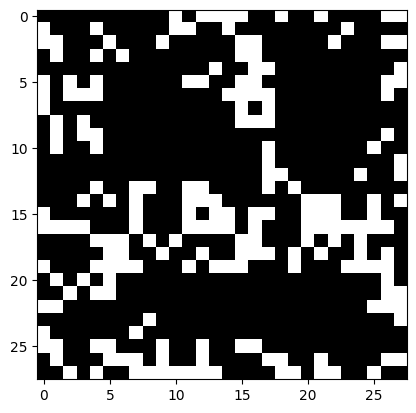

551 iteration and loss 0.09494741261005402
552 iteration and loss 0.09460672736167908
553 iteration and loss 0.094123475253582
554 iteration and loss 0.09354901313781738
555 iteration and loss 0.09312183409929276
556 iteration and loss 0.09275858104228973
557 iteration and loss 0.09221050888299942
558 iteration and loss 0.09176644682884216
559 iteration and loss 0.09148646891117096
560 iteration and loss 0.09092529863119125
561 iteration and loss 0.09051332622766495
562 iteration and loss 0.09013213217258453
563 iteration and loss 0.0897892564535141
564 iteration and loss 0.08923453837633133
565 iteration and loss 0.08889822661876678
566 iteration and loss 0.08847440779209137
567 iteration and loss 0.08803588151931763
568 iteration and loss 0.08763069659471512
569 iteration and loss 0.08732879906892776
570 iteration and loss 0.08684824407100677
571 iteration and loss 0.08658743649721146
572 iteration and loss 0.08601465076208115
573 iteration and loss 0.08573086559772491
574 iteration 

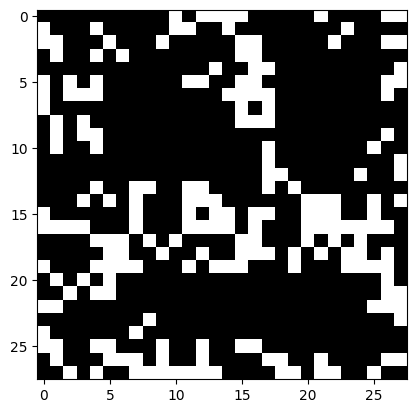

601 iteration and loss 0.07646270841360092
602 iteration and loss 0.0761972963809967
603 iteration and loss 0.07584165036678314
604 iteration and loss 0.07553109526634216
605 iteration and loss 0.07535023987293243
606 iteration and loss 0.07502204924821854
607 iteration and loss 0.07487860321998596
608 iteration and loss 0.07442400604486465
609 iteration and loss 0.07419358938932419
610 iteration and loss 0.07395458966493607
611 iteration and loss 0.07365108281373978
612 iteration and loss 0.0733935683965683
613 iteration and loss 0.07315205037593842
614 iteration and loss 0.07291457802057266
615 iteration and loss 0.07276705652475357
616 iteration and loss 0.07235618680715561
617 iteration and loss 0.07202835381031036
618 iteration and loss 0.07189811766147614
619 iteration and loss 0.07165279984474182
620 iteration and loss 0.0713585838675499
621 iteration and loss 0.07114111632108688
622 iteration and loss 0.07090005278587341
623 iteration and loss 0.0707014724612236
624 iteration a

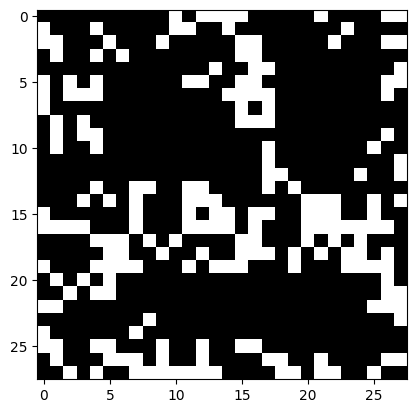

651 iteration and loss 0.064703069627285
652 iteration and loss 0.06446346640586853
653 iteration and loss 0.06423219293355942
654 iteration and loss 0.06414980441331863
655 iteration and loss 0.06391274929046631
656 iteration and loss 0.0637502521276474
657 iteration and loss 0.06347260624170303
658 iteration and loss 0.0633775070309639
659 iteration and loss 0.06320350617170334
660 iteration and loss 0.06290086358785629
661 iteration and loss 0.06270919740200043
662 iteration and loss 0.06255490332841873
663 iteration and loss 0.062393300235271454
664 iteration and loss 0.0622037798166275
665 iteration and loss 0.062028005719184875
666 iteration and loss 0.06189567968249321
667 iteration and loss 0.061667732894420624
668 iteration and loss 0.06153815984725952
669 iteration and loss 0.06130509078502655
670 iteration and loss 0.06113621965050697
671 iteration and loss 0.060969457030296326
672 iteration and loss 0.060812532901763916
673 iteration and loss 0.06062731519341469
674 iterati

In [179]:
final_img = minimize_error(random_image,target_label)

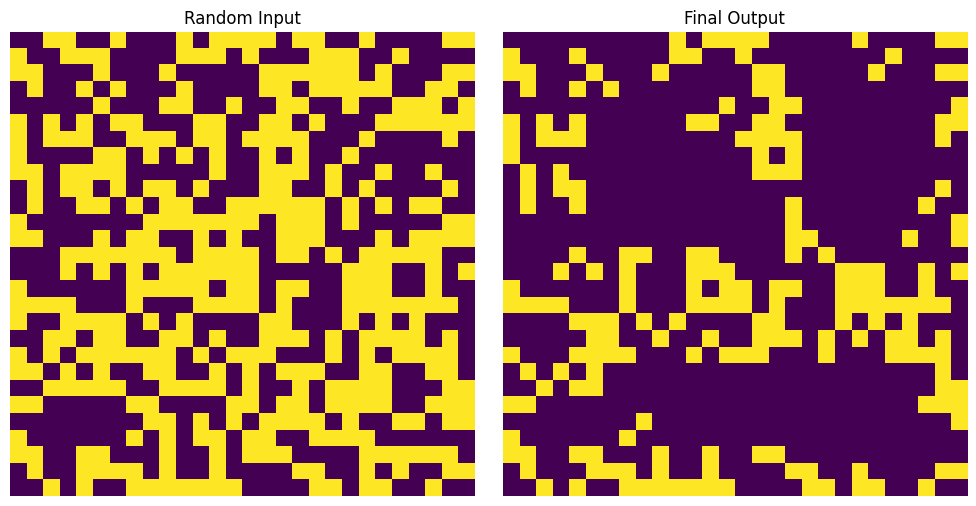

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(random_image_copy.squeeze().astype('uint8')*255)
ax1.set_title('Random Input')
ax1.axis('off')
ax2.imshow(final_img.squeeze().astype('uint8')*255)
ax2.set_title('Final Output')
ax2.axis('off')
plt.tight_layout()
plt.show()

In [181]:
#this is output that get with using gradient tab predict 
outputs=custom_model.predict (final_img)
print(np.argmax(outputs))

1/1 [==============================] - 0s 17ms/step
2


In [182]:
#this is output that get with using change pixel seperatly predict 
outputs=custom_model.predict (pixel_output) 
print(np.argmax(outputs))

1/1 [==============================] - 0s 17ms/step
2


# Discusion

* When considering the performance values of the model trained in the first section, it is observed that the model demonstrates good performance. The loss graph indicates that the model fits the data well. Relevant score metrics and the graph can be found in the cells above. In the second section, two different optimization methods are implemented. The first involves changing pixel values sequentially and altering the image based on the change in loss, while the second method uses the gradient tape to compute gradients. Initially, when pixel manipulation was performed, it was observed that the model made changes to the input image, but it couldn't generate an image resembling the target class (2) that we provided. A similar outcome was achieved using the gradient tape method. 

* I speculated whether this issue might be related to the parameters used in the model training. In my research, it was recommended to apply batch normalization after convolutional layers. I added batch normalization after each convolutional layer and repeated the steps. However, the results remained unchanged. Additionally, manually changing the gradient and pixel values to obtain images and feeding them into the model resulted in the prediction of the target class (2). The outputs of the model and visualized images can be found in the cells above. 

* It is possible that the complexity of the model may be excessive for the complexity of the problem. However, since the assignment specified a parameter count slightly higher than that of the AlexNet model, I did not reduce the parameter count during model training. I did not want to compromise the parameters for the sake of the assignment, although I acknowledge that the model complexity might be a contributing factor. For my personal curiosity, I plan to experiment beyond the scope of the assignment. *

In [317]:
# The function get from homework 1
#Added noise
def add_noise(img): 
  
    # Getting the dimensions of the image 
    row , col,_ = img.shape 
      
   
    number_of_pixels = random.randint(300, 1000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to white 
        if img[y_coord][x_coord] == 0.0:
            img[y_coord][x_coord] = 1.0
          

    number_of_pixels = random.randint(300, 1000) 
    for i in range(number_of_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to black 
        if img[y_coord][x_coord] == 1.0:
            img[y_coord][x_coord] = 1.0
          
    return img

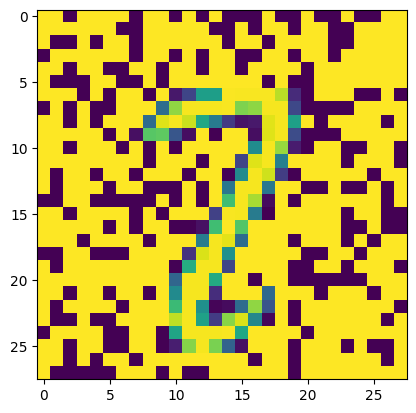

In [319]:
plt.imshow(added_noise.squeeze())
plt.show()

In [323]:
original_input = test_x[30].copy()
added_noise = add_noise(original_input).reshape(1,28,28,1)

0 iteration and loss 8.99072551727295


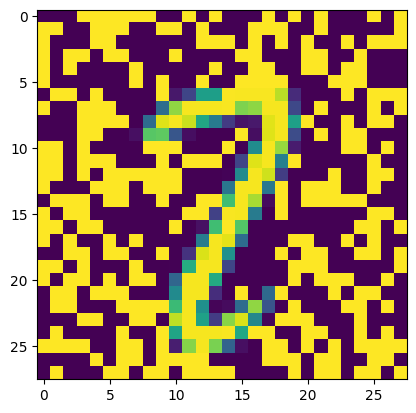

1 iteration and loss 8.965980529785156
2 iteration and loss 8.941771507263184
3 iteration and loss 8.912256240844727
4 iteration and loss 8.875414848327637
5 iteration and loss 8.831463813781738
6 iteration and loss 8.783750534057617
7 iteration and loss 8.738395690917969
8 iteration and loss 8.689599990844727
9 iteration and loss 8.632415771484375
10 iteration and loss 8.558416366577148
11 iteration and loss 8.47208023071289
12 iteration and loss 8.374785423278809
13 iteration and loss 8.277392387390137
14 iteration and loss 8.16669750213623
15 iteration and loss 8.007734298706055
16 iteration and loss 7.8198323249816895
17 iteration and loss 7.634122848510742
18 iteration and loss 7.449835300445557
19 iteration and loss 7.207566738128662
20 iteration and loss 6.938967704772949
21 iteration and loss 6.693538665771484
22 iteration and loss 6.4359130859375
23 iteration and loss 6.161413669586182
24 iteration and loss 6.006771087646484
25 iteration and loss 5.904750347137451
26 iteration

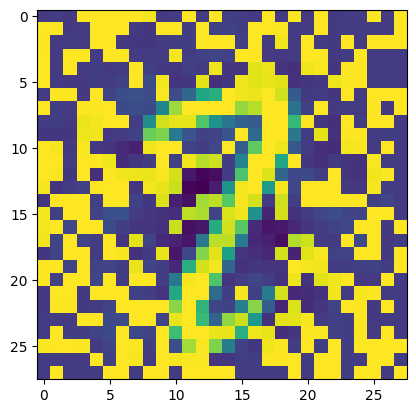

51 iteration and loss 4.135266304016113
52 iteration and loss 4.000340461730957
53 iteration and loss 3.8546595573425293
54 iteration and loss 3.724627733230591
55 iteration and loss 3.58247447013855
56 iteration and loss 3.4439544677734375
57 iteration and loss 3.307108163833618
58 iteration and loss 3.123955011367798
59 iteration and loss 2.906179666519165
60 iteration and loss 2.7022695541381836
61 iteration and loss 2.385349988937378
62 iteration and loss 2.0125732421875
63 iteration and loss 1.6283607482910156
64 iteration and loss 1.3298747539520264
65 iteration and loss 1.1137744188308716
66 iteration and loss 0.939541220664978
67 iteration and loss 0.8063693046569824
68 iteration and loss 0.6825870275497437
69 iteration and loss 0.5795848369598389
70 iteration and loss 0.49305030703544617
71 iteration and loss 0.4290305972099304
72 iteration and loss 0.3808581233024597
73 iteration and loss 0.34042444825172424
74 iteration and loss 0.30720460414886475
75 iteration and loss 0.27

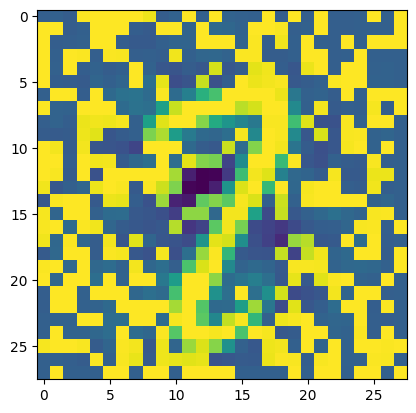

101 iteration and loss 0.08370780944824219
102 iteration and loss 0.0812167227268219
103 iteration and loss 0.0790930911898613
104 iteration and loss 0.07684241235256195
105 iteration and loss 0.07468977570533752
106 iteration and loss 0.07272682338953018
107 iteration and loss 0.07088939100503922
108 iteration and loss 0.06928107887506485
109 iteration and loss 0.06773266941308975
110 iteration and loss 0.06620361655950546
111 iteration and loss 0.06480709463357925
112 iteration and loss 0.0634010061621666
113 iteration and loss 0.062029238790273666
114 iteration and loss 0.06076452136039734
115 iteration and loss 0.059551555663347244
116 iteration and loss 0.05831575021147728
117 iteration and loss 0.05730695649981499
118 iteration and loss 0.056341543793678284
119 iteration and loss 0.05544297769665718
120 iteration and loss 0.05446763336658478
121 iteration and loss 0.05363382026553154
122 iteration and loss 0.05277103930711746
123 iteration and loss 0.05192222818732262
124 iterati

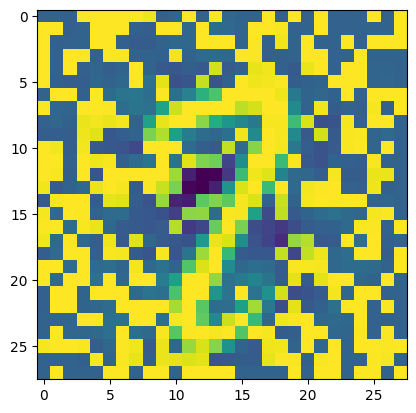

151 iteration and loss 0.03610572963953018
152 iteration and loss 0.035723570734262466
153 iteration and loss 0.03535772114992142
154 iteration and loss 0.03502684459090233
155 iteration and loss 0.034661777317523956
156 iteration and loss 0.0343395434319973
157 iteration and loss 0.034019045531749725
158 iteration and loss 0.03366052359342575
159 iteration and loss 0.03337912634015083
160 iteration and loss 0.033081620931625366
161 iteration and loss 0.032776180654764175
162 iteration and loss 0.03247514367103577
163 iteration and loss 0.03219272196292877
164 iteration and loss 0.031897399574518204
165 iteration and loss 0.03165154159069061
166 iteration and loss 0.031384363770484924
167 iteration and loss 0.031146930530667305
168 iteration and loss 0.030895108357071877
169 iteration and loss 0.03060056082904339
170 iteration and loss 0.03038884326815605
171 iteration and loss 0.03016655705869198
172 iteration and loss 0.029956020414829254
173 iteration and loss 0.029705865308642387
1

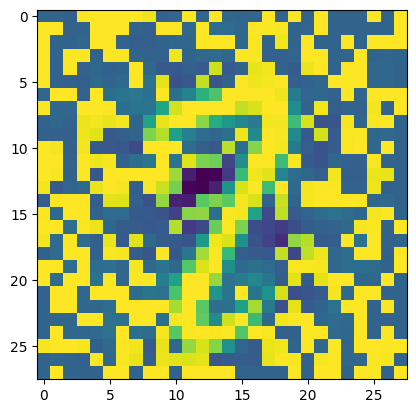

201 iteration and loss 0.02480434812605381
202 iteration and loss 0.024713175371289253
203 iteration and loss 0.02457127906382084
204 iteration and loss 0.024442393332719803
205 iteration and loss 0.024291152134537697
206 iteration and loss 0.02415001019835472
207 iteration and loss 0.02403794601559639
208 iteration and loss 0.023918766528367996
209 iteration and loss 0.023784209042787552
210 iteration and loss 0.02367163635790348
211 iteration and loss 0.023585248738527298
212 iteration and loss 0.023430267348885536
213 iteration and loss 0.023331398144364357
214 iteration and loss 0.023200953379273415
215 iteration and loss 0.023062339052557945
216 iteration and loss 0.023002460598945618
217 iteration and loss 0.022858690470457077
218 iteration and loss 0.022763026878237724
219 iteration and loss 0.022665373980998993
220 iteration and loss 0.022565029561519623
221 iteration and loss 0.022434135898947716
222 iteration and loss 0.022336449474096298
223 iteration and loss 0.022231874987

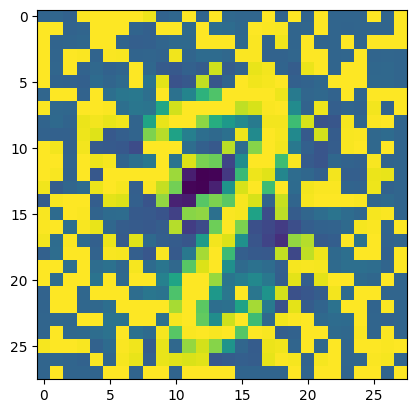

251 iteration and loss 0.01981114037334919
252 iteration and loss 0.01971670426428318
253 iteration and loss 0.01965288445353508
254 iteration and loss 0.019536806270480156
255 iteration and loss 0.01952429860830307
256 iteration and loss 0.019431589171290398
257 iteration and loss 0.01937008835375309
258 iteration and loss 0.019295021891593933
259 iteration and loss 0.019236555323004723
260 iteration and loss 0.01915130391716957
261 iteration and loss 0.019123468548059464
262 iteration and loss 0.019026394933462143
263 iteration and loss 0.01897761970758438
264 iteration and loss 0.018894335255026817
265 iteration and loss 0.018846256658434868
266 iteration and loss 0.018758397549390793
267 iteration and loss 0.01872154325246811
268 iteration and loss 0.01863589696586132
269 iteration and loss 0.018587220460176468
270 iteration and loss 0.01852075569331646
271 iteration and loss 0.01848681829869747
272 iteration and loss 0.01840033195912838
273 iteration and loss 0.01832636259496212
2

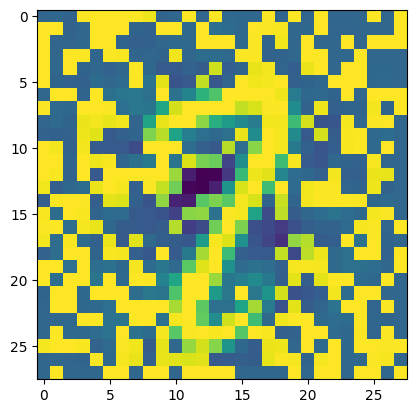

301 iteration and loss 0.016925647854804993
302 iteration and loss 0.01687290146946907
303 iteration and loss 0.01681874692440033
304 iteration and loss 0.01678440161049366
305 iteration and loss 0.016726255416870117
306 iteration and loss 0.01668745093047619
307 iteration and loss 0.01664629951119423
308 iteration and loss 0.016582166776061058
309 iteration and loss 0.01656903512775898
310 iteration and loss 0.016521546989679337
311 iteration and loss 0.016483204439282417
312 iteration and loss 0.016421053558588028
313 iteration and loss 0.0163856390863657
314 iteration and loss 0.01635162904858589
315 iteration and loss 0.01630530320107937
316 iteration and loss 0.016269415616989136
317 iteration and loss 0.016239507123827934
318 iteration and loss 0.016161272302269936
319 iteration and loss 0.016156697645783424
320 iteration and loss 0.016096051782369614
321 iteration and loss 0.01606203243136406
322 iteration and loss 0.016018275171518326
323 iteration and loss 0.015978388488292694

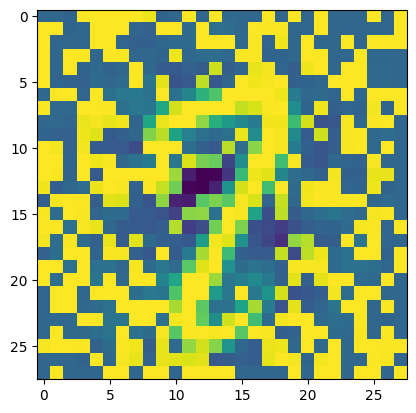

351 iteration and loss 0.015037275850772858
352 iteration and loss 0.015009562484920025
353 iteration and loss 0.0149726876989007
354 iteration and loss 0.014935224317014217
355 iteration and loss 0.01491983886808157
356 iteration and loss 0.014896584674715996
357 iteration and loss 0.014858883805572987
358 iteration and loss 0.014824234880506992
359 iteration and loss 0.014798042364418507
360 iteration and loss 0.014763391576707363
361 iteration and loss 0.014734260737895966
362 iteration and loss 0.014687508344650269
363 iteration and loss 0.014671062119305134
364 iteration and loss 0.014650151133537292
365 iteration and loss 0.014590942300856113
366 iteration and loss 0.014583305455744267
367 iteration and loss 0.014558163471519947
368 iteration and loss 0.014514575712382793
369 iteration and loss 0.014496129006147385
370 iteration and loss 0.014471455477178097
371 iteration and loss 0.01445042248815298
372 iteration and loss 0.014416934922337532
373 iteration and loss 0.01438532676

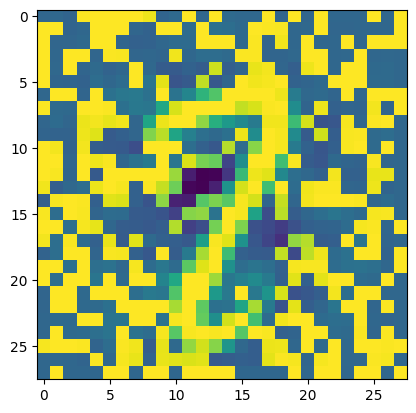

401 iteration and loss 0.01364969927817583
402 iteration and loss 0.013638409785926342
403 iteration and loss 0.013588548637926579
404 iteration and loss 0.013574553653597832
405 iteration and loss 0.013542918488383293
406 iteration and loss 0.013525277376174927
407 iteration and loss 0.013491993770003319
408 iteration and loss 0.013469411991536617
409 iteration and loss 0.013451182283461094
410 iteration and loss 0.01342260092496872
411 iteration and loss 0.013391783460974693
412 iteration and loss 0.01337225828319788
413 iteration and loss 0.013361083343625069
414 iteration and loss 0.01331320870667696
415 iteration and loss 0.013294975273311138
416 iteration and loss 0.01325968373566866
417 iteration and loss 0.013232391327619553
418 iteration and loss 0.013221685774624348
419 iteration and loss 0.013206862844526768
420 iteration and loss 0.013171215541660786
421 iteration and loss 0.013151920400559902
422 iteration and loss 0.013115212321281433
423 iteration and loss 0.013096740469

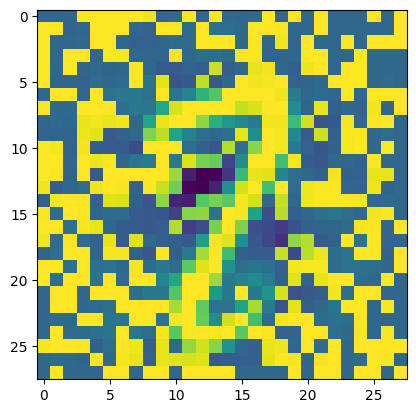

451 iteration and loss 0.01252993755042553
452 iteration and loss 0.01250756997615099
453 iteration and loss 0.012486967258155346
454 iteration and loss 0.012467188760638237
455 iteration and loss 0.01244835089892149
456 iteration and loss 0.012424097396433353
457 iteration and loss 0.01240596640855074
458 iteration and loss 0.012383242137730122
459 iteration and loss 0.012379592284560204
460 iteration and loss 0.012358398176729679
461 iteration and loss 0.012329550459980965
462 iteration and loss 0.012317657470703125
463 iteration and loss 0.012294931337237358
464 iteration and loss 0.01228409819304943
465 iteration and loss 0.012270909734070301
466 iteration and loss 0.01225936971604824
467 iteration and loss 0.012220979668200016
468 iteration and loss 0.012220509350299835
469 iteration and loss 0.0121982516720891
470 iteration and loss 0.012175758369266987
471 iteration and loss 0.012170459143817425
472 iteration and loss 0.012159624136984348
473 iteration and loss 0.012139367870986

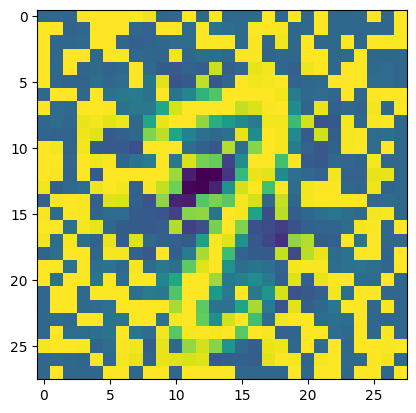

501 iteration and loss 0.011691149324178696
502 iteration and loss 0.01166664157062769
503 iteration and loss 0.011652384884655476
504 iteration and loss 0.011639541015028954
505 iteration and loss 0.011628818698227406
506 iteration and loss 0.01161255780607462
507 iteration and loss 0.01160607673227787
508 iteration and loss 0.01157897524535656
509 iteration and loss 0.011565777473151684
510 iteration and loss 0.011554582044482231
511 iteration and loss 0.011535256169736385
512 iteration and loss 0.011526890099048615
513 iteration and loss 0.011515340767800808
514 iteration and loss 0.011488353833556175
515 iteration and loss 0.011480105109512806
516 iteration and loss 0.01147468388080597
517 iteration and loss 0.011457713320851326
518 iteration and loss 0.011451702564954758
519 iteration and loss 0.011428603902459145
520 iteration and loss 0.01142212189733982
521 iteration and loss 0.011403147131204605
522 iteration and loss 0.011388178914785385
523 iteration and loss 0.0113766286522

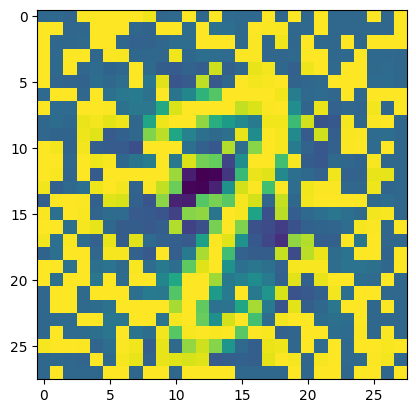

551 iteration and loss 0.011029704473912716
552 iteration and loss 0.011014612391591072
553 iteration and loss 0.010992799885571003
554 iteration and loss 0.01098313182592392
555 iteration and loss 0.01097959466278553
556 iteration and loss 0.010980065912008286
557 iteration and loss 0.010950352996587753
558 iteration and loss 0.010946933180093765
559 iteration and loss 0.010934199206531048
560 iteration and loss 0.01090967282652855
561 iteration and loss 0.010900003835558891
562 iteration and loss 0.010900475084781647
563 iteration and loss 0.010881608352065086
564 iteration and loss 0.01088007539510727
565 iteration and loss 0.010857553221285343
566 iteration and loss 0.010847293771803379
567 iteration and loss 0.010848237201571465
568 iteration and loss 0.010837742127478123
569 iteration and loss 0.010820642113685608
570 iteration and loss 0.010804958641529083
571 iteration and loss 0.010785145685076714
572 iteration and loss 0.010787858627736568
573 iteration and loss 0.01077288109

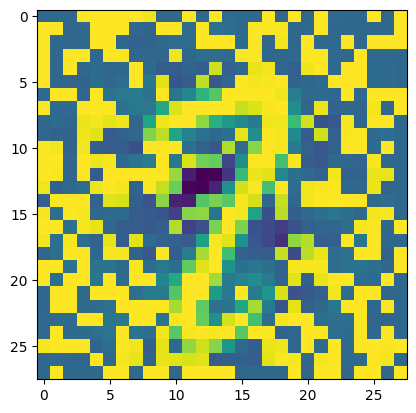

601 iteration and loss 0.010468452237546444
602 iteration and loss 0.01045583002269268
603 iteration and loss 0.01045252662152052
604 iteration and loss 0.010441319085657597
605 iteration and loss 0.01043199934065342
606 iteration and loss 0.01040510181337595
607 iteration and loss 0.010401916690170765
608 iteration and loss 0.010398022830486298
609 iteration and loss 0.010388113558292389
610 iteration and loss 0.010388821363449097
611 iteration and loss 0.010365460999310017
612 iteration and loss 0.010342218913137913
613 iteration and loss 0.010335847735404968
614 iteration and loss 0.010331718251109123
615 iteration and loss 0.01032310537993908
616 iteration and loss 0.010309419594705105
617 iteration and loss 0.010308356955647469
618 iteration and loss 0.010289243422448635
619 iteration and loss 0.010277798399329185
620 iteration and loss 0.010279804468154907
621 iteration and loss 0.010267768986523151
622 iteration and loss 0.010241692885756493
623 iteration and loss 0.010237680748

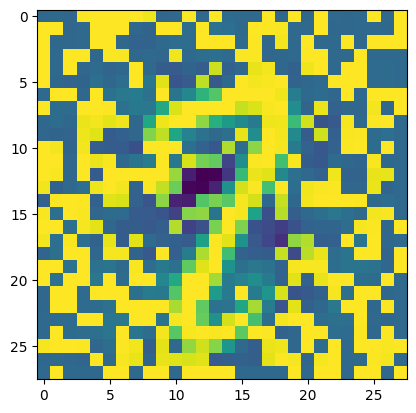

651 iteration and loss 0.009970268234610558
652 iteration and loss 0.009959527291357517
653 iteration and loss 0.009944302029907703
654 iteration and loss 0.009940761141479015
655 iteration and loss 0.009913141839206219
656 iteration and loss 0.00991420354694128
657 iteration and loss 0.009904171340167522
658 iteration and loss 0.009898505173623562
659 iteration and loss 0.009890242479741573
660 iteration and loss 0.009887882508337498
661 iteration and loss 0.009875605814158916
662 iteration and loss 0.009857664816081524
663 iteration and loss 0.009854004718363285
664 iteration and loss 0.009842673316597939
665 iteration and loss 0.009843617677688599
666 iteration and loss 0.00983252190053463
667 iteration and loss 0.009816586039960384
668 iteration and loss 0.009807024151086807
669 iteration and loss 0.00980076752603054
670 iteration and loss 0.009794392623007298
671 iteration and loss 0.009789552539587021
672 iteration and loss 0.009778810665011406
673 iteration and loss 0.0097654713

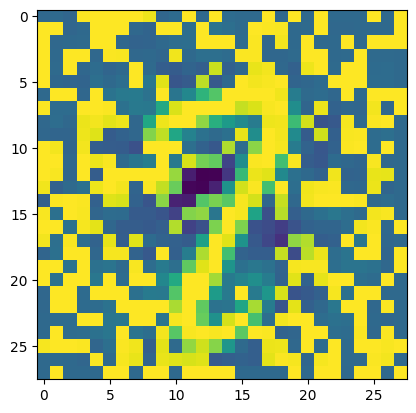

701 iteration and loss 0.009531348943710327
702 iteration and loss 0.009524618275463581
703 iteration and loss 0.009523791261017323
704 iteration and loss 0.009524972178041935
705 iteration and loss 0.00951552577316761
706 iteration and loss 0.009494389407336712
707 iteration and loss 0.009488367475569248
708 iteration and loss 0.009484943002462387
709 iteration and loss 0.009470300748944283
710 iteration and loss 0.009462743066251278
711 iteration and loss 0.00946191605180502
712 iteration and loss 0.009448453783988953
713 iteration and loss 0.009441369213163853
714 iteration and loss 0.009436173364520073
715 iteration and loss 0.009431449696421623
716 iteration and loss 0.009426489472389221
717 iteration and loss 0.009412436746060848
718 iteration and loss 0.009397320449352264
719 iteration and loss 0.00939696654677391
720 iteration and loss 0.009389644488692284
721 iteration and loss 0.00939023494720459
722 iteration and loss 0.009386220015585423
723 iteration and loss 0.00937145762

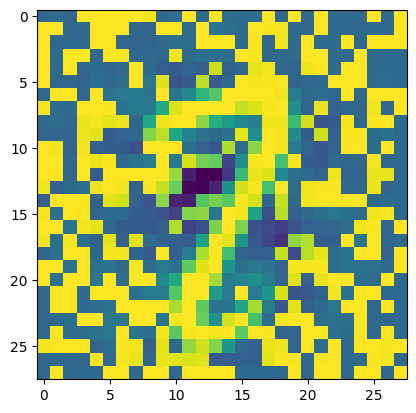

751 iteration and loss 0.009170908480882645
752 iteration and loss 0.009152009151875973
753 iteration and loss 0.009145866148173809
754 iteration and loss 0.009145275689661503
755 iteration and loss 0.00913299061357975
756 iteration and loss 0.009131336584687233
757 iteration and loss 0.009120705537497997
758 iteration and loss 0.00911751575767994
759 iteration and loss 0.009106175974011421
760 iteration and loss 0.009096607565879822
761 iteration and loss 0.009081250056624413
762 iteration and loss 0.009081014432013035
763 iteration and loss 0.009078769944608212
764 iteration and loss 0.00907723419368267
765 iteration and loss 0.009065184742212296
766 iteration and loss 0.009066247381269932
767 iteration and loss 0.00904781837016344
768 iteration and loss 0.009042738936841488
769 iteration and loss 0.009039903059601784
770 iteration and loss 0.009037304669618607
771 iteration and loss 0.00902312807738781
772 iteration and loss 0.009019938297569752
773 iteration and loss 0.009007179178

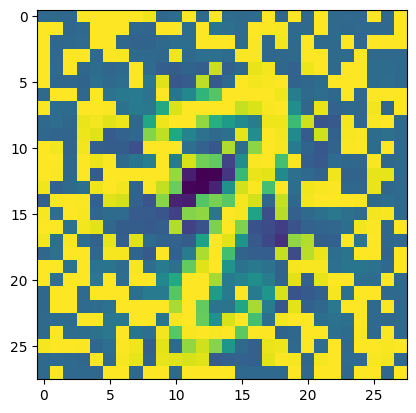

801 iteration and loss 0.008840586990118027
802 iteration and loss 0.008831843733787537
803 iteration and loss 0.008826525881886482
804 iteration and loss 0.008814001455903053
805 iteration and loss 0.008801711723208427
806 iteration and loss 0.00880194827914238
807 iteration and loss 0.008802775293588638
808 iteration and loss 0.008791076950728893
809 iteration and loss 0.008792022243142128
810 iteration and loss 0.008780205622315407
811 iteration and loss 0.008774297311902046
812 iteration and loss 0.008767325431108475
813 iteration and loss 0.008761889301240444
814 iteration and loss 0.008755272254347801
815 iteration and loss 0.008747118525207043
816 iteration and loss 0.008747236803174019
817 iteration and loss 0.00874203722923994
818 iteration and loss 0.008734592236578465
819 iteration and loss 0.008730811066925526
820 iteration and loss 0.008722184225916862
821 iteration and loss 0.008712257258594036
822 iteration and loss 0.008706466294825077
823 iteration and loss 0.008703393

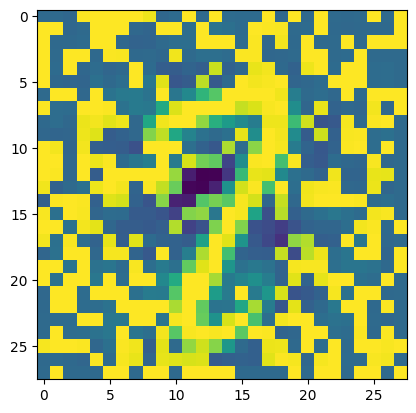

851 iteration and loss 0.00854727067053318
852 iteration and loss 0.008538642898201942
853 iteration and loss 0.008535214699804783
854 iteration and loss 0.00852812360972166
855 iteration and loss 0.0085295420140028
856 iteration and loss 0.008516894653439522
857 iteration and loss 0.008500701747834682
858 iteration and loss 0.00849703699350357
859 iteration and loss 0.008497982285916805
860 iteration and loss 0.008487699553370476
861 iteration and loss 0.008485098369419575
862 iteration and loss 0.008482025936245918
863 iteration and loss 0.008476942777633667
864 iteration and loss 0.008466659113764763
865 iteration and loss 0.008465122431516647
866 iteration and loss 0.008463585749268532
867 iteration and loss 0.008460157550871372
868 iteration and loss 0.00844703707844019
869 iteration and loss 0.008437816984951496
870 iteration and loss 0.008436989039182663
871 iteration and loss 0.008428242057561874
872 iteration and loss 0.00842185877263546
873 iteration and loss 0.00841831229627

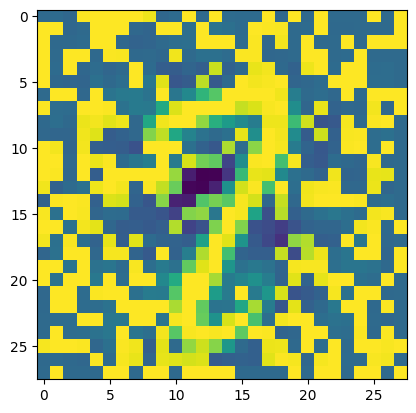

901 iteration and loss 0.008282243274152279
902 iteration and loss 0.00828141625970602
903 iteration and loss 0.008274085819721222
904 iteration and loss 0.008266400545835495
905 iteration and loss 0.008258006535470486
906 iteration and loss 0.008248666301369667
907 iteration and loss 0.00823849905282259
908 iteration and loss 0.008238380774855614
909 iteration and loss 0.008237316273152828
910 iteration and loss 0.008234124630689621
911 iteration and loss 0.00823755282908678
912 iteration and loss 0.008234006352722645
913 iteration and loss 0.008217099122703075
914 iteration and loss 0.008219463750720024
915 iteration and loss 0.00819912739098072
916 iteration and loss 0.008200427517294884
917 iteration and loss 0.00819912739098072
918 iteration and loss 0.008193806745111942
919 iteration and loss 0.008194752037525177
920 iteration and loss 0.008191442117094994
921 iteration and loss 0.008173469454050064
922 iteration and loss 0.008169685490429401
923 iteration and loss 0.008170395158

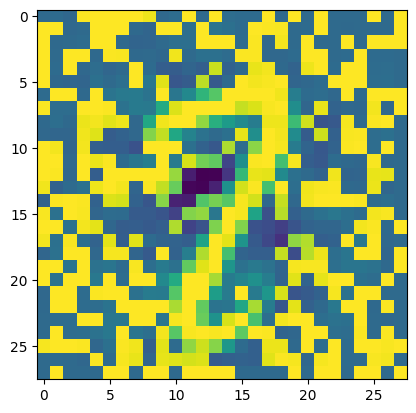

951 iteration and loss 0.008042333647608757
952 iteration and loss 0.008040087297558784
953 iteration and loss 0.00803157314658165
954 iteration and loss 0.008026961237192154
955 iteration and loss 0.00802613329142332
956 iteration and loss 0.008023531176149845
957 iteration and loss 0.008016908541321754
958 iteration and loss 0.00801135040819645
959 iteration and loss 0.008013715967535973
960 iteration and loss 0.00800839439034462
961 iteration and loss 0.007993612438440323
962 iteration and loss 0.007993730716407299
963 iteration and loss 0.007991010323166847
964 iteration and loss 0.007991719990968704
965 iteration and loss 0.007991956546902657
966 iteration and loss 0.007983914576470852
967 iteration and loss 0.00796913169324398
968 iteration and loss 0.007970432750880718
969 iteration and loss 0.007967120967805386
970 iteration and loss 0.007958133704960346
971 iteration and loss 0.007955058477818966
972 iteration and loss 0.00794950034469366
973 iteration and loss 0.0079409852623

In [325]:
final_img_noise = minimize_error(added_noise,target_label,num_iterations= 1000,learning_rate=0.01)

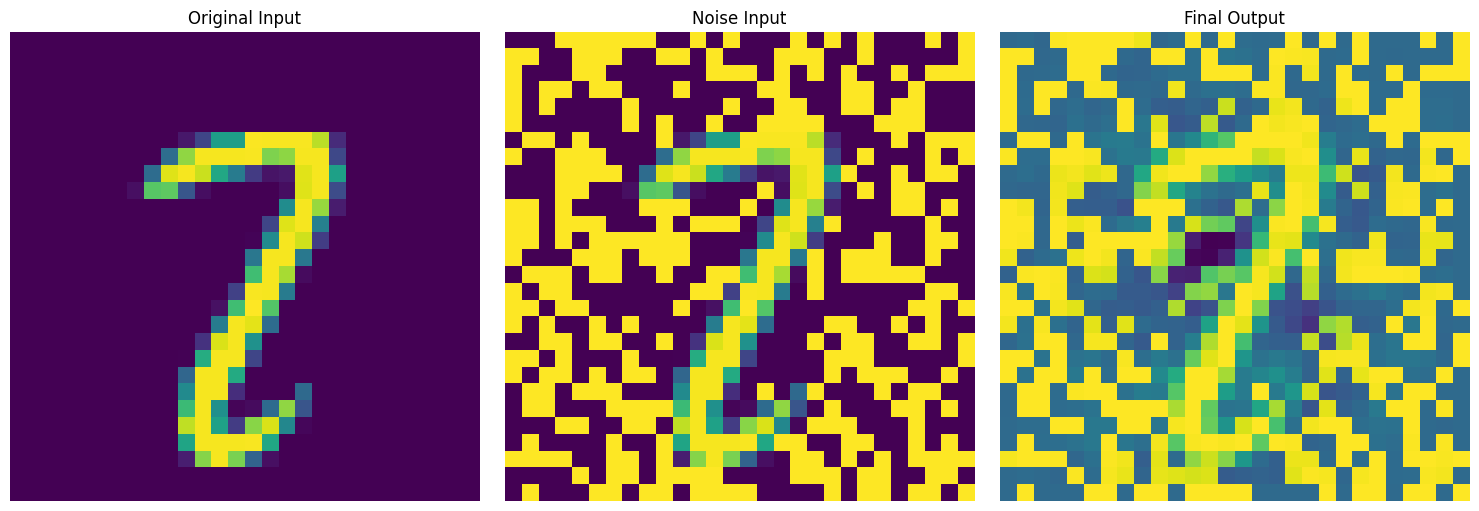

In [328]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(test_x[30])
ax1.set_title('Original Input')
ax1.axis('off')
ax2.imshow(added_noise.squeeze())
ax2.set_title('Noise Input')
ax2.axis('off')
ax3.imshow(final_img_noise.squeeze())
ax3.set_title('Final Output')
ax3.axis('off')
plt.tight_layout()
plt.show()

# Discusion

* I utilized the gradient tape to observe the model's ability to transform the original MNIST dataset back to its original form by adding salt and pepper noise. Since the pixel manipulation process was manual and did not involve any gradient computation, I did not include an additional step for gradient calculation in this procedure. I printed the model output every 50 iterations, and at each iteration, I also displayed the loss to monitor changes in loss over time.

* The observations indicate that the model attempts to reduce noise and strives to resemble the original images of class 2. This was evident in the outputs generated by the model throughout the iterations

In [331]:
new_target_label = np.array([0.,0.,0.5,0.5,0.,0.,0.,0.,0.,0.]).reshape(1,10)
random_image_new = np.random.randint(2, size=(1,28,28,1)).astype('float32')

0 iteration and loss 8.522603034973145


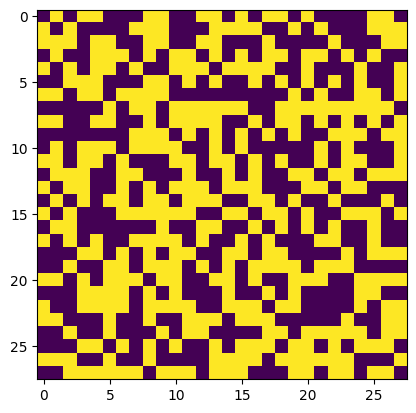

1 iteration and loss 8.452692031860352
2 iteration and loss 8.378604888916016
3 iteration and loss 8.300797462463379
4 iteration and loss 8.201956748962402
5 iteration and loss 8.09191608428955
6 iteration and loss 7.971338272094727
7 iteration and loss 7.834132194519043
8 iteration and loss 7.6589813232421875
9 iteration and loss 7.383065223693848
10 iteration and loss 7.053485870361328
11 iteration and loss 6.722990036010742
12 iteration and loss 6.477738380432129
13 iteration and loss 6.226594924926758
14 iteration and loss 5.972137451171875
15 iteration and loss 5.733095169067383
16 iteration and loss 5.5840067863464355
17 iteration and loss 5.487860202789307
18 iteration and loss 5.434329986572266
19 iteration and loss 5.40019416809082
20 iteration and loss 5.3692946434021
21 iteration and loss 5.337981700897217
22 iteration and loss 5.306441783905029
23 iteration and loss 5.275156021118164
24 iteration and loss 5.241653919219971
25 iteration and loss 5.207601070404053
26 iteratio

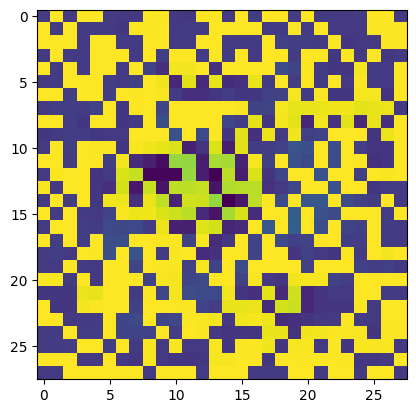

51 iteration and loss 4.017455577850342
52 iteration and loss 3.945230722427368
53 iteration and loss 3.869004964828491
54 iteration and loss 3.788198471069336
55 iteration and loss 3.7001633644104004
56 iteration and loss 3.6107184886932373
57 iteration and loss 3.518538236618042
58 iteration and loss 3.404275894165039
59 iteration and loss 3.2759554386138916
60 iteration and loss 3.1421337127685547
61 iteration and loss 3.0098395347595215
62 iteration and loss 2.882873058319092
63 iteration and loss 2.748337507247925
64 iteration and loss 2.622667074203491
65 iteration and loss 2.5261762142181396
66 iteration and loss 2.452115058898926
67 iteration and loss 2.395537853240967
68 iteration and loss 2.3529655933380127
69 iteration and loss 2.3222947120666504
70 iteration and loss 2.299722671508789
71 iteration and loss 2.282541036605835
72 iteration and loss 2.270953416824341
73 iteration and loss 2.2616193294525146
74 iteration and loss 2.254225015640259
75 iteration and loss 2.2485711

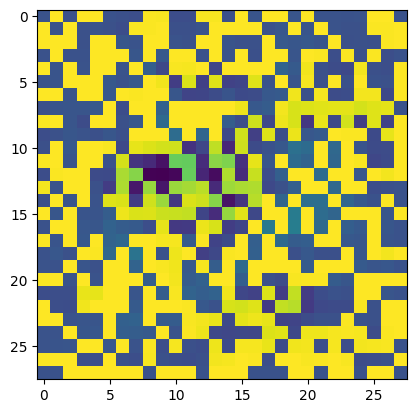

101 iteration and loss 2.20793080329895
102 iteration and loss 2.206700563430786
103 iteration and loss 2.206230640411377
104 iteration and loss 2.205402135848999
105 iteration and loss 2.2043871879577637
106 iteration and loss 2.2039811611175537
107 iteration and loss 2.2032089233398438
108 iteration and loss 2.2021498680114746
109 iteration and loss 2.2013721466064453
110 iteration and loss 2.200835704803467
111 iteration and loss 2.2002103328704834
112 iteration and loss 2.199448585510254
113 iteration and loss 2.198837995529175
114 iteration and loss 2.1981451511383057
115 iteration and loss 2.19748592376709
116 iteration and loss 2.1969985961914062
117 iteration and loss 2.1962082386016846
118 iteration and loss 2.195788860321045
119 iteration and loss 2.1952013969421387
120 iteration and loss 2.194572687149048
121 iteration and loss 2.1941754817962646
122 iteration and loss 2.193462371826172
123 iteration and loss 2.193206548690796
124 iteration and loss 2.1924240589141846
125 it

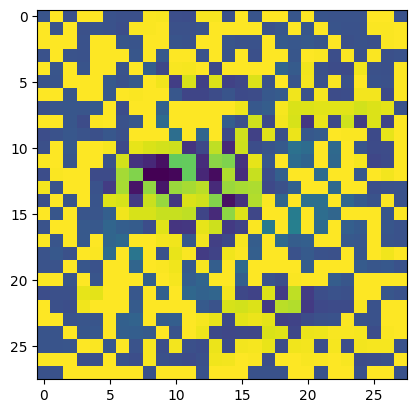

151 iteration and loss 2.179123640060425
152 iteration and loss 2.178781270980835
153 iteration and loss 2.177947759628296
154 iteration and loss 2.1776278018951416
155 iteration and loss 2.1770310401916504
156 iteration and loss 2.176358461380005
157 iteration and loss 2.17608642578125
158 iteration and loss 2.175574779510498
159 iteration and loss 2.175241231918335
160 iteration and loss 2.174729585647583
161 iteration and loss 2.1742136478424072
162 iteration and loss 2.174041509628296
163 iteration and loss 2.1735873222351074
164 iteration and loss 2.1732800006866455
165 iteration and loss 2.1727161407470703
166 iteration and loss 2.1724705696105957
167 iteration and loss 2.172001361846924
168 iteration and loss 2.171915054321289
169 iteration and loss 2.1714160442352295
170 iteration and loss 2.1710915565490723
171 iteration and loss 2.1707305908203125
172 iteration and loss 2.1705214977264404
173 iteration and loss 2.1702864170074463
174 iteration and loss 2.169776439666748
175 i

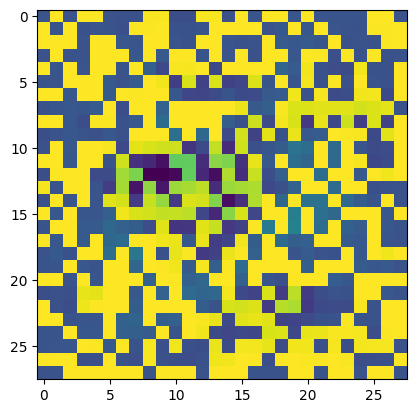

201 iteration and loss 2.1637234687805176
202 iteration and loss 2.1635899543762207
203 iteration and loss 2.163571834564209
204 iteration and loss 2.163429021835327
205 iteration and loss 2.163259267807007
206 iteration and loss 2.1629650592803955
207 iteration and loss 2.16290545463562
208 iteration and loss 2.162839651107788
209 iteration and loss 2.1626248359680176
210 iteration and loss 2.1624250411987305
211 iteration and loss 2.1623430252075195
212 iteration and loss 2.162057638168335
213 iteration and loss 2.1620075702667236
214 iteration and loss 2.161759614944458
215 iteration and loss 2.1618165969848633
216 iteration and loss 2.1617088317871094
217 iteration and loss 2.161553382873535
218 iteration and loss 2.161406993865967
219 iteration and loss 2.1612157821655273
220 iteration and loss 2.161158561706543
221 iteration and loss 2.1610465049743652
222 iteration and loss 2.160886526107788
223 iteration and loss 2.1606907844543457
224 iteration and loss 2.160742998123169
225 i

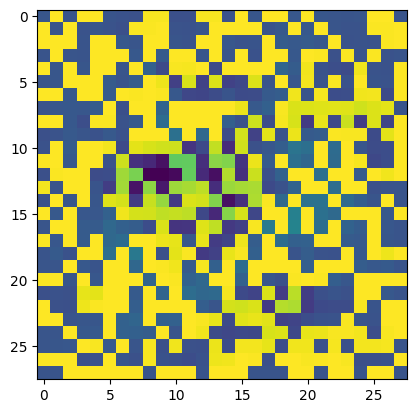

251 iteration and loss 2.1578209400177
252 iteration and loss 2.157763957977295
253 iteration and loss 2.1575911045074463
254 iteration and loss 2.1574161052703857
255 iteration and loss 2.1572437286376953
256 iteration and loss 2.157075881958008
257 iteration and loss 2.1571357250213623
258 iteration and loss 2.1570513248443604
259 iteration and loss 2.156780481338501
260 iteration and loss 2.156873941421509
261 iteration and loss 2.1565628051757812
262 iteration and loss 2.1568996906280518
263 iteration and loss 2.1565489768981934
264 iteration and loss 2.156428575515747
265 iteration and loss 2.1562435626983643
266 iteration and loss 2.1562156677246094
267 iteration and loss 2.1561193466186523
268 iteration and loss 2.1561717987060547
269 iteration and loss 2.1559433937072754
270 iteration and loss 2.155856132507324
271 iteration and loss 2.1560423374176025
272 iteration and loss 2.1560325622558594
273 iteration and loss 2.1557159423828125
274 iteration and loss 2.15565824508667
275

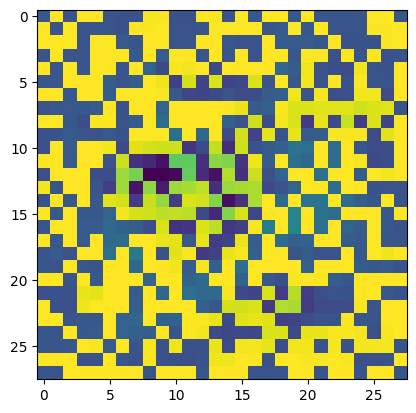

301 iteration and loss 2.1509287357330322
302 iteration and loss 2.1507272720336914
303 iteration and loss 2.150563955307007
304 iteration and loss 2.1504154205322266
305 iteration and loss 2.150127410888672
306 iteration and loss 2.1497907638549805
307 iteration and loss 2.1498360633850098
308 iteration and loss 2.1496644020080566
309 iteration and loss 2.149393081665039
310 iteration and loss 2.1491897106170654
311 iteration and loss 2.1491174697875977
312 iteration and loss 2.148732900619507
313 iteration and loss 2.1486291885375977
314 iteration and loss 2.148395538330078
315 iteration and loss 2.148261785507202
316 iteration and loss 2.147775650024414
317 iteration and loss 2.1480534076690674
318 iteration and loss 2.147909164428711
319 iteration and loss 2.147536039352417
320 iteration and loss 2.1473946571350098
321 iteration and loss 2.1473987102508545
322 iteration and loss 2.1470611095428467
323 iteration and loss 2.146845817565918
324 iteration and loss 2.146789789199829
325

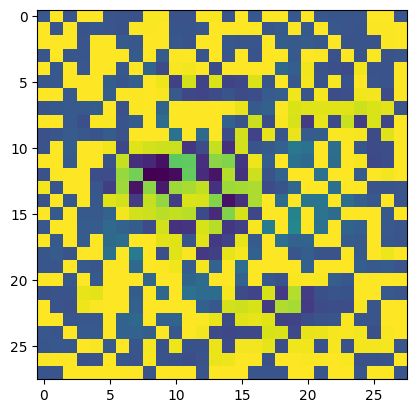

351 iteration and loss 2.142397880554199
352 iteration and loss 2.142212152481079
353 iteration and loss 2.14219331741333
354 iteration and loss 2.1417670249938965
355 iteration and loss 2.141561508178711
356 iteration and loss 2.141477346420288
357 iteration and loss 2.141305446624756
358 iteration and loss 2.140984296798706
359 iteration and loss 2.14070725440979
360 iteration and loss 2.1407840251922607
361 iteration and loss 2.140256881713867
362 iteration and loss 2.1399290561676025
363 iteration and loss 2.1396102905273438
364 iteration and loss 2.139529228210449
365 iteration and loss 2.1388356685638428
366 iteration and loss 2.1383461952209473
367 iteration and loss 2.1380162239074707
368 iteration and loss 2.137526512145996
369 iteration and loss 2.1373910903930664
370 iteration and loss 2.1368682384490967
371 iteration and loss 2.1366312503814697
372 iteration and loss 2.1360700130462646
373 iteration and loss 2.1357972621917725
374 iteration and loss 2.1355440616607666
375 i

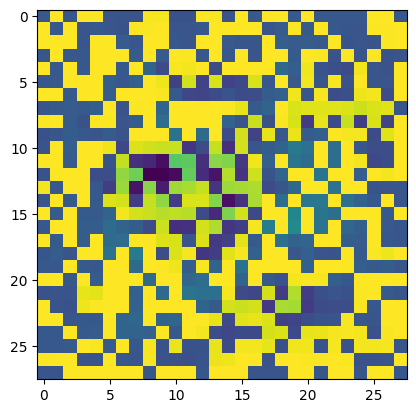

401 iteration and loss 2.122515916824341
402 iteration and loss 2.1221425533294678
403 iteration and loss 2.1217427253723145
404 iteration and loss 2.121256113052368
405 iteration and loss 2.120946168899536
406 iteration and loss 2.1205005645751953
407 iteration and loss 2.1196045875549316
408 iteration and loss 2.1194329261779785
409 iteration and loss 2.118837594985962
410 iteration and loss 2.11848783493042
411 iteration and loss 2.1180384159088135
412 iteration and loss 2.1176254749298096
413 iteration and loss 2.1172032356262207
414 iteration and loss 2.116669178009033
415 iteration and loss 2.116271734237671
416 iteration and loss 2.115938425064087
417 iteration and loss 2.115417242050171
418 iteration and loss 2.1148695945739746
419 iteration and loss 2.1144602298736572
420 iteration and loss 2.114346504211426
421 iteration and loss 2.1135621070861816
422 iteration and loss 2.1132967472076416
423 iteration and loss 2.11287784576416
424 iteration and loss 2.1123199462890625
425 i

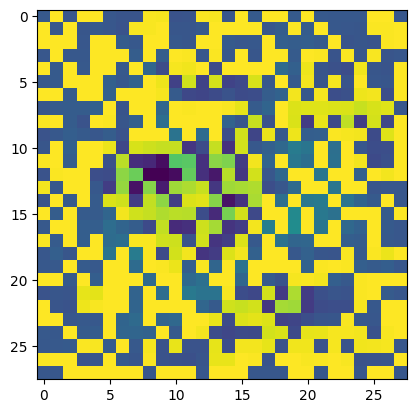

451 iteration and loss 2.0748190879821777
452 iteration and loss 2.0739006996154785
453 iteration and loss 2.072087526321411
454 iteration and loss 2.070904493331909
455 iteration and loss 2.0697765350341797
456 iteration and loss 2.068070650100708
457 iteration and loss 2.067056179046631
458 iteration and loss 2.0660200119018555
459 iteration and loss 2.0644078254699707
460 iteration and loss 2.063178777694702
461 iteration and loss 2.062290668487549
462 iteration and loss 2.0610599517822266
463 iteration and loss 2.0597405433654785
464 iteration and loss 2.0582656860351562
465 iteration and loss 2.056741237640381
466 iteration and loss 2.055833578109741
467 iteration and loss 2.054386854171753
468 iteration and loss 2.0529744625091553
469 iteration and loss 2.0514814853668213
470 iteration and loss 2.0502665042877197
471 iteration and loss 2.0490481853485107
472 iteration and loss 2.0480732917785645
473 iteration and loss 2.046751022338867
474 iteration and loss 2.0449585914611816
47

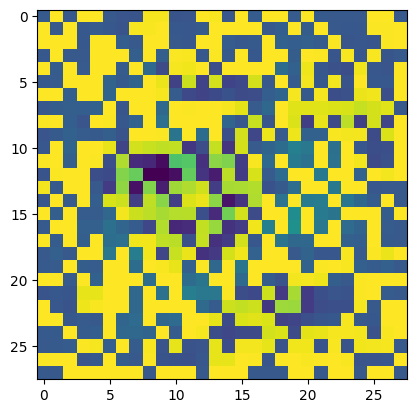

501 iteration and loss 2.0012803077697754
502 iteration and loss 2.0001490116119385
503 iteration and loss 1.9979151487350464
504 iteration and loss 1.9961782693862915
505 iteration and loss 1.9944254159927368
506 iteration and loss 1.9924647808074951
507 iteration and loss 1.9907124042510986
508 iteration and loss 1.98848557472229
509 iteration and loss 1.9867019653320312
510 iteration and loss 1.9848253726959229
511 iteration and loss 1.9827468395233154
512 iteration and loss 1.9809365272521973
513 iteration and loss 1.9788541793823242
514 iteration and loss 1.9772579669952393
515 iteration and loss 1.9749835729599
516 iteration and loss 1.9731370210647583
517 iteration and loss 1.9714179039001465
518 iteration and loss 1.9692842960357666
519 iteration and loss 1.9675440788269043
520 iteration and loss 1.965687870979309
521 iteration and loss 1.9638211727142334
522 iteration and loss 1.9617722034454346
523 iteration and loss 1.9598051309585571
524 iteration and loss 1.957724094390869

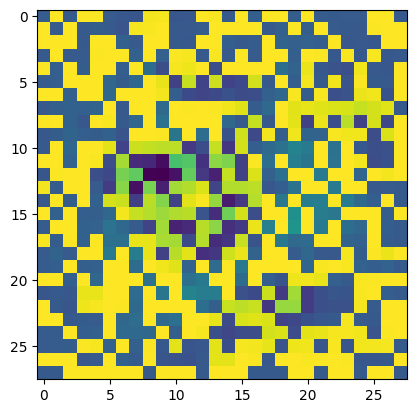

551 iteration and loss 1.9026501178741455
552 iteration and loss 1.9008762836456299
553 iteration and loss 1.8990252017974854
554 iteration and loss 1.8971402645111084
555 iteration and loss 1.8950927257537842
556 iteration and loss 1.892783522605896
557 iteration and loss 1.8910726308822632
558 iteration and loss 1.8890469074249268
559 iteration and loss 1.8867547512054443
560 iteration and loss 1.885167121887207
561 iteration and loss 1.883131980895996
562 iteration and loss 1.8810988664627075
563 iteration and loss 1.879021167755127
564 iteration and loss 1.87739896774292
565 iteration and loss 1.8749964237213135
566 iteration and loss 1.8732508420944214
567 iteration and loss 1.8709747791290283
568 iteration and loss 1.868910551071167
569 iteration and loss 1.8667006492614746
570 iteration and loss 1.8641924858093262
571 iteration and loss 1.8623559474945068
572 iteration and loss 1.859702229499817
573 iteration and loss 1.8573997020721436
574 iteration and loss 1.8554298877716064


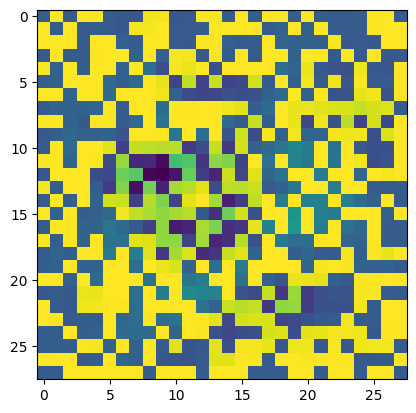

601 iteration and loss 1.7744759321212769
602 iteration and loss 1.7707688808441162
603 iteration and loss 1.7673583030700684
604 iteration and loss 1.763075590133667
605 iteration and loss 1.759443759918213
606 iteration and loss 1.7555615901947021
607 iteration and loss 1.7515184879302979
608 iteration and loss 1.7475885152816772
609 iteration and loss 1.743896245956421
610 iteration and loss 1.7398545742034912
611 iteration and loss 1.7358012199401855
612 iteration and loss 1.7313258647918701
613 iteration and loss 1.7270981073379517
614 iteration and loss 1.722065806388855
615 iteration and loss 1.7175710201263428
616 iteration and loss 1.7132704257965088
617 iteration and loss 1.7085222005844116
618 iteration and loss 1.704646348953247
619 iteration and loss 1.6999220848083496
620 iteration and loss 1.6958998441696167
621 iteration and loss 1.6914207935333252
622 iteration and loss 1.6864840984344482
623 iteration and loss 1.6818840503692627
624 iteration and loss 1.67765057086944

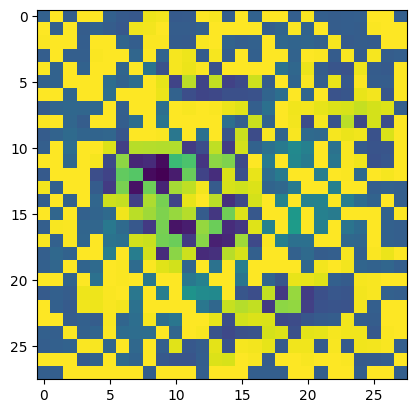

651 iteration and loss 1.4921743869781494
652 iteration and loss 1.4821794033050537
653 iteration and loss 1.4719390869140625
654 iteration and loss 1.4616280794143677
655 iteration and loss 1.4514092206954956
656 iteration and loss 1.4409267902374268
657 iteration and loss 1.4303890466690063
658 iteration and loss 1.4190771579742432
659 iteration and loss 1.4073426723480225
660 iteration and loss 1.3958966732025146
661 iteration and loss 1.38456130027771
662 iteration and loss 1.372612714767456
663 iteration and loss 1.3608739376068115
664 iteration and loss 1.346321940422058
665 iteration and loss 1.3318804502487183
666 iteration and loss 1.31736421585083
667 iteration and loss 1.301763653755188
668 iteration and loss 1.2833222150802612
669 iteration and loss 1.2662320137023926
670 iteration and loss 1.2521175146102905
671 iteration and loss 1.2376344203948975
672 iteration and loss 1.2232768535614014
673 iteration and loss 1.2098970413208008
674 iteration and loss 1.1972969770431519

In [332]:
final_image_new = minimize_error(random_image_new.copy(),new_target_label)

In [334]:
output=custom_model(final_image_new)
print(output)
print(np.argmax(output))

tf.Tensor(
[[4.6370663e-02 6.8669004e-04 4.4854668e-01 2.9441169e-01 5.6189118e-04
  4.2956727e-04 9.2417124e-04 8.3215041e-03 1.9501556e-01 4.7316141e-03]], shape=(1, 10), dtype=float32)
2


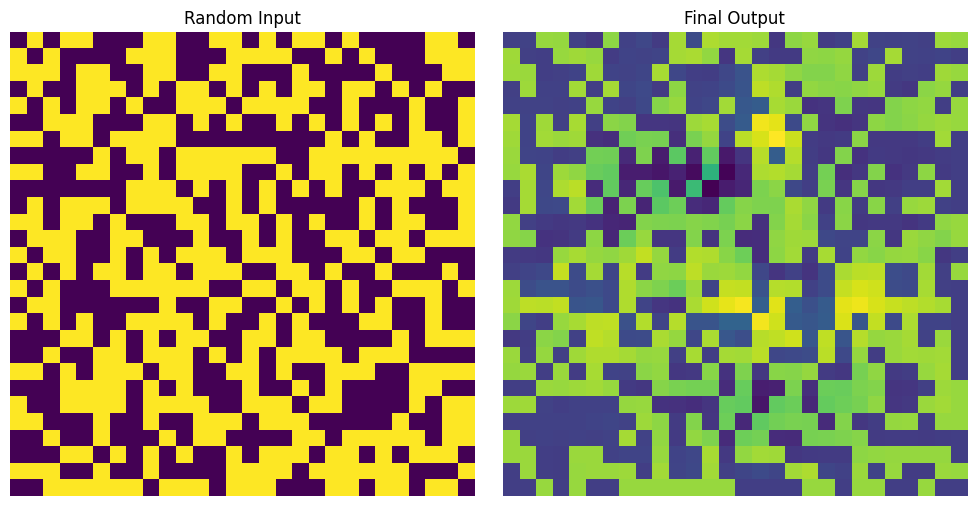

In [335]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(random_image_new.squeeze())
ax1.set_title('Random Input')
ax1.axis('off')
ax2.imshow(final_img.squeeze())
ax2.set_title('Final Output')
ax2.axis('off')
plt.tight_layout()
plt.show()

0 iteration and loss 8.72665786743164


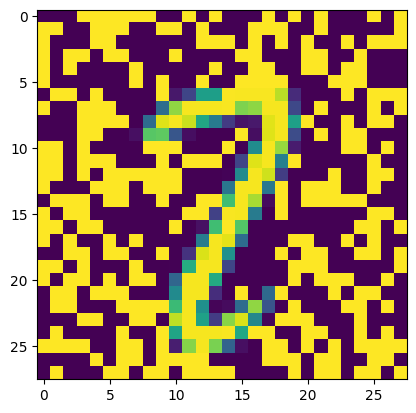

1 iteration and loss 8.711636543273926
2 iteration and loss 8.695265769958496
3 iteration and loss 8.678329467773438
4 iteration and loss 8.659351348876953
5 iteration and loss 8.63375473022461
6 iteration and loss 8.605240821838379
7 iteration and loss 8.574586868286133
8 iteration and loss 8.543975830078125
9 iteration and loss 8.514880180358887
10 iteration and loss 8.485055923461914
11 iteration and loss 8.447187423706055
12 iteration and loss 8.393655776977539
13 iteration and loss 8.330726623535156
14 iteration and loss 8.261283874511719
15 iteration and loss 8.185928344726562
16 iteration and loss 8.10033130645752
17 iteration and loss 8.005780220031738
18 iteration and loss 7.873185634613037
19 iteration and loss 7.708287239074707
20 iteration and loss 7.531357288360596
21 iteration and loss 7.359241485595703
22 iteration and loss 7.145752429962158
23 iteration and loss 6.896800994873047
24 iteration and loss 6.635493278503418
25 iteration and loss 6.385102272033691
26 iteratio

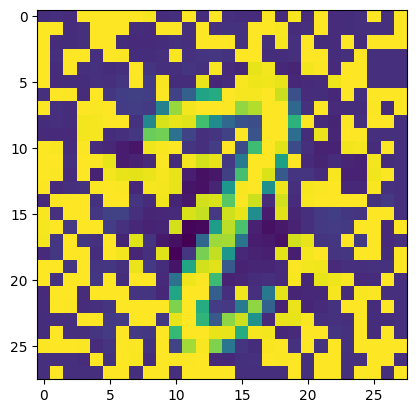

51 iteration and loss 5.400412559509277
52 iteration and loss 5.3875017166137695
53 iteration and loss 5.373847007751465
54 iteration and loss 5.360842227935791
55 iteration and loss 5.3476691246032715
56 iteration and loss 5.334170341491699
57 iteration and loss 5.320827484130859
58 iteration and loss 5.3080644607543945
59 iteration and loss 5.295624256134033
60 iteration and loss 5.283130168914795
61 iteration and loss 5.270682334899902
62 iteration and loss 5.256501197814941
63 iteration and loss 5.240872383117676
64 iteration and loss 5.2249650955200195
65 iteration and loss 5.208207130432129
66 iteration and loss 5.189144134521484
67 iteration and loss 5.168495178222656
68 iteration and loss 5.144112586975098
69 iteration and loss 5.1193318367004395
70 iteration and loss 5.092364311218262
71 iteration and loss 5.067808151245117
72 iteration and loss 5.040616035461426
73 iteration and loss 5.010668754577637
74 iteration and loss 4.9823455810546875
75 iteration and loss 4.9533705711

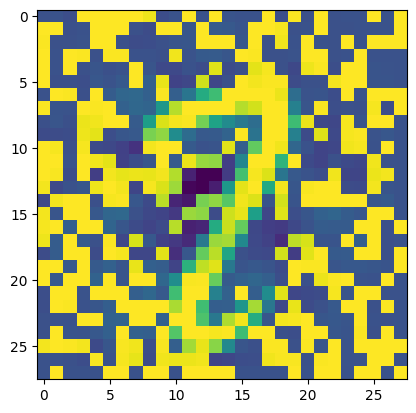

101 iteration and loss 2.8881609439849854
102 iteration and loss 2.8193905353546143
103 iteration and loss 2.7490625381469727
104 iteration and loss 2.6847753524780273
105 iteration and loss 2.6199004650115967
106 iteration and loss 2.567564010620117
107 iteration and loss 2.5178959369659424
108 iteration and loss 2.4700520038604736
109 iteration and loss 2.4242122173309326
110 iteration and loss 2.3803157806396484
111 iteration and loss 2.3378100395202637
112 iteration and loss 2.301030158996582
113 iteration and loss 2.2673988342285156
114 iteration and loss 2.238365411758423
115 iteration and loss 2.2135252952575684
116 iteration and loss 2.191242218017578
117 iteration and loss 2.1715025901794434
118 iteration and loss 2.153404712677002
119 iteration and loss 2.135248899459839
120 iteration and loss 2.117144823074341
121 iteration and loss 2.100832939147949
122 iteration and loss 2.0849344730377197
123 iteration and loss 2.07022762298584
124 iteration and loss 2.0558924674987793
12

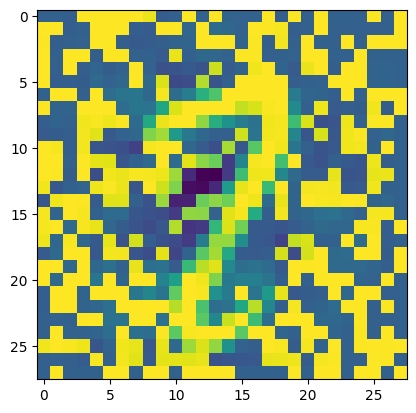

151 iteration and loss 1.7394945621490479
152 iteration and loss 1.7290871143341064
153 iteration and loss 1.7198686599731445
154 iteration and loss 1.7107446193695068
155 iteration and loss 1.7023530006408691
156 iteration and loss 1.6942403316497803
157 iteration and loss 1.6858508586883545
158 iteration and loss 1.6781072616577148
159 iteration and loss 1.6706316471099854
160 iteration and loss 1.6626536846160889
161 iteration and loss 1.6550143957138062
162 iteration and loss 1.6477609872817993
163 iteration and loss 1.6399834156036377
164 iteration and loss 1.6323833465576172
165 iteration and loss 1.6248712539672852
166 iteration and loss 1.6168057918548584
167 iteration and loss 1.6082979440689087
168 iteration and loss 1.5995045900344849
169 iteration and loss 1.5908102989196777
170 iteration and loss 1.5822374820709229
171 iteration and loss 1.5732017755508423
172 iteration and loss 1.5638073682785034
173 iteration and loss 1.5530939102172852
174 iteration and loss 1.541487216

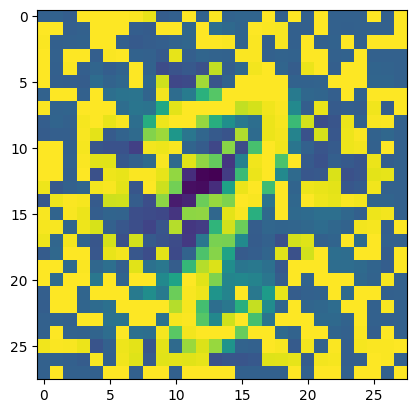

201 iteration and loss 1.3198989629745483
202 iteration and loss 1.3141982555389404
203 iteration and loss 1.3085001707077026
204 iteration and loss 1.303019404411316
205 iteration and loss 1.2971800565719604
206 iteration and loss 1.2922303676605225
207 iteration and loss 1.2861911058425903
208 iteration and loss 1.281514286994934
209 iteration and loss 1.2756545543670654
210 iteration and loss 1.2703253030776978
211 iteration and loss 1.264962077140808
212 iteration and loss 1.2598148584365845
213 iteration and loss 1.254563331604004
214 iteration and loss 1.2496665716171265
215 iteration and loss 1.2443057298660278
216 iteration and loss 1.239370584487915
217 iteration and loss 1.2353262901306152
218 iteration and loss 1.2302227020263672
219 iteration and loss 1.225723147392273
220 iteration and loss 1.2217258214950562
221 iteration and loss 1.2169814109802246
222 iteration and loss 1.2125483751296997
223 iteration and loss 1.208116054534912
224 iteration and loss 1.2044954299926758

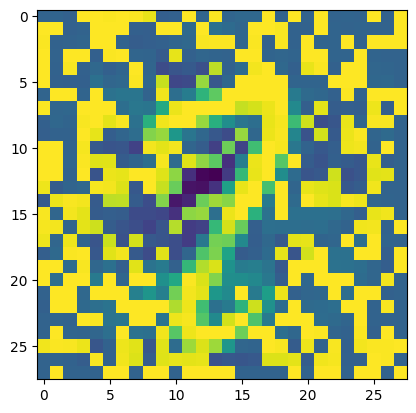

251 iteration and loss 1.1168005466461182
252 iteration and loss 1.1142553091049194
253 iteration and loss 1.1117520332336426
254 iteration and loss 1.1094521284103394
255 iteration and loss 1.10710608959198
256 iteration and loss 1.1048094034194946
257 iteration and loss 1.1025364398956299
258 iteration and loss 1.1002346277236938
259 iteration and loss 1.097857117652893
260 iteration and loss 1.0958917140960693
261 iteration and loss 1.093602180480957
262 iteration and loss 1.0914435386657715
263 iteration and loss 1.0894948244094849
264 iteration and loss 1.087337851524353
265 iteration and loss 1.0852314233779907
266 iteration and loss 1.0831880569458008
267 iteration and loss 1.0811543464660645
268 iteration and loss 1.0791606903076172
269 iteration and loss 1.0771472454071045
270 iteration and loss 1.0749576091766357
271 iteration and loss 1.0734678506851196
272 iteration and loss 1.0715597867965698
273 iteration and loss 1.0697613954544067
274 iteration and loss 1.06805241107940

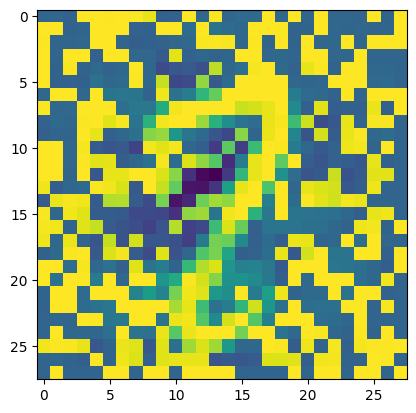

301 iteration and loss 1.0267038345336914
302 iteration and loss 1.0254582166671753
303 iteration and loss 1.0243256092071533
304 iteration and loss 1.0230461359024048
305 iteration and loss 1.0219106674194336
306 iteration and loss 1.0204797983169556
307 iteration and loss 1.019366979598999
308 iteration and loss 1.0182416439056396
309 iteration and loss 1.0169414281845093
310 iteration and loss 1.0156618356704712
311 iteration and loss 1.0147430896759033
312 iteration and loss 1.013422966003418
313 iteration and loss 1.0125616788864136
314 iteration and loss 1.0113654136657715
315 iteration and loss 1.01028573513031
316 iteration and loss 1.0090117454528809
317 iteration and loss 1.0081084966659546
318 iteration and loss 1.006868839263916
319 iteration and loss 1.0056304931640625
320 iteration and loss 1.0046464204788208
321 iteration and loss 1.0036959648132324
322 iteration and loss 1.0026094913482666
323 iteration and loss 1.0015603303909302
324 iteration and loss 1.00056946277618

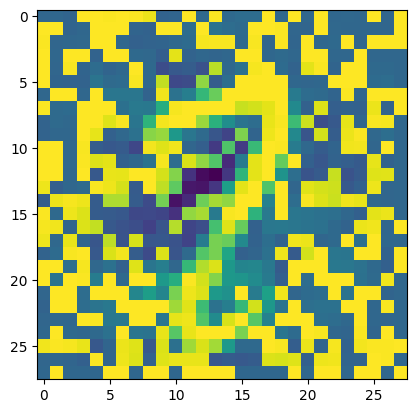

351 iteration and loss 0.9755295515060425
352 iteration and loss 0.9746731519699097
353 iteration and loss 0.9740587472915649
354 iteration and loss 0.9733102321624756
355 iteration and loss 0.9723384380340576
356 iteration and loss 0.9718279838562012
357 iteration and loss 0.9710067510604858
358 iteration and loss 0.9701107740402222
359 iteration and loss 0.9693642854690552
360 iteration and loss 0.9687716960906982
361 iteration and loss 0.968050479888916
362 iteration and loss 0.9671591520309448
363 iteration and loss 0.9665614366531372
364 iteration and loss 0.9658175706863403
365 iteration and loss 0.9650241136550903
366 iteration and loss 0.9642102718353271
367 iteration and loss 0.9635441303253174
368 iteration and loss 0.9628664255142212
369 iteration and loss 0.9622496366500854
370 iteration and loss 0.9615942239761353
371 iteration and loss 0.9607664346694946
372 iteration and loss 0.9601552486419678
373 iteration and loss 0.9595164060592651
374 iteration and loss 0.9589253664

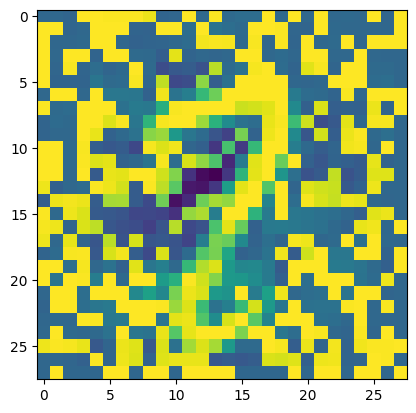

401 iteration and loss 0.9437869787216187
402 iteration and loss 0.9432454109191895
403 iteration and loss 0.9427934885025024
404 iteration and loss 0.9423140287399292
405 iteration and loss 0.9418559074401855
406 iteration and loss 0.9414230585098267
407 iteration and loss 0.9409278631210327
408 iteration and loss 0.9404665231704712
409 iteration and loss 0.9400317668914795
410 iteration and loss 0.9394948482513428
411 iteration and loss 0.939118504524231
412 iteration and loss 0.9385640621185303
413 iteration and loss 0.9380863904953003
414 iteration and loss 0.9377596378326416
415 iteration and loss 0.9372669458389282
416 iteration and loss 0.9368934631347656
417 iteration and loss 0.9363360404968262
418 iteration and loss 0.93604975938797
419 iteration and loss 0.9355722069740295
420 iteration and loss 0.9350598454475403
421 iteration and loss 0.9348129034042358
422 iteration and loss 0.9344000220298767
423 iteration and loss 0.9339790344238281
424 iteration and loss 0.933530390262

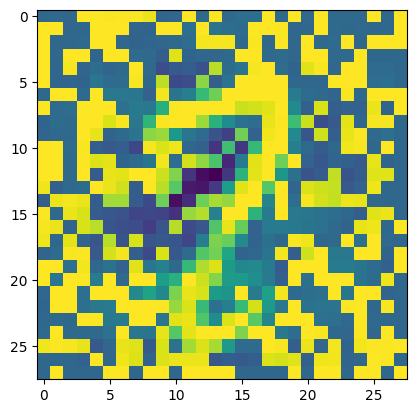

451 iteration and loss 0.9225603342056274
452 iteration and loss 0.9222531914710999
453 iteration and loss 0.9219266176223755
454 iteration and loss 0.9214192032814026
455 iteration and loss 0.9211068749427795
456 iteration and loss 0.9207167625427246
457 iteration and loss 0.9204031825065613
458 iteration and loss 0.919903576374054
459 iteration and loss 0.9195763468742371
460 iteration and loss 0.9191478490829468
461 iteration and loss 0.9188844561576843
462 iteration and loss 0.9184319376945496
463 iteration and loss 0.9180837869644165
464 iteration and loss 0.9177364110946655
465 iteration and loss 0.9173107147216797
466 iteration and loss 0.9169638752937317
467 iteration and loss 0.9165481925010681
468 iteration and loss 0.9162499904632568
469 iteration and loss 0.9159349799156189
470 iteration and loss 0.9154670238494873
471 iteration and loss 0.915211021900177
472 iteration and loss 0.9147809743881226
473 iteration and loss 0.9144007563591003
474 iteration and loss 0.91420912742

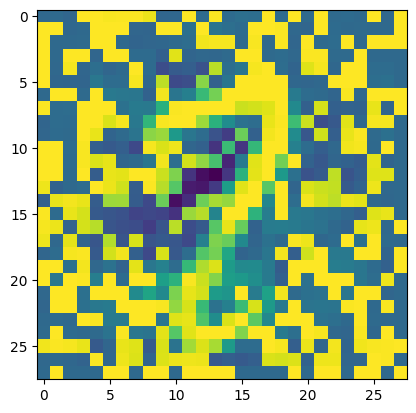

501 iteration and loss 0.9056592583656311
502 iteration and loss 0.9054068326950073
503 iteration and loss 0.9049164056777954
504 iteration and loss 0.904753565788269
505 iteration and loss 0.9043831825256348
506 iteration and loss 0.9041668772697449
507 iteration and loss 0.9037566781044006
508 iteration and loss 0.9034777879714966
509 iteration and loss 0.9032256603240967
510 iteration and loss 0.903068482875824
511 iteration and loss 0.9026967287063599
512 iteration and loss 0.9023427367210388
513 iteration and loss 0.9020567536354065
514 iteration and loss 0.9018097519874573
515 iteration and loss 0.9015209078788757
516 iteration and loss 0.9011833071708679
517 iteration and loss 0.9008569717407227
518 iteration and loss 0.9005675911903381
519 iteration and loss 0.9002934694290161
520 iteration and loss 0.9000930190086365
521 iteration and loss 0.8997071385383606
522 iteration and loss 0.8993472456932068
523 iteration and loss 0.8991479873657227
524 iteration and loss 0.89890849590

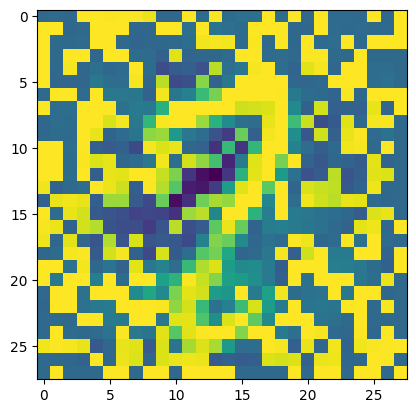

551 iteration and loss 0.8915770053863525
552 iteration and loss 0.8914093971252441
553 iteration and loss 0.8912111520767212
554 iteration and loss 0.8910404443740845
555 iteration and loss 0.8907555937767029
556 iteration and loss 0.8906005024909973
557 iteration and loss 0.8903222680091858
558 iteration and loss 0.8901554942131042
559 iteration and loss 0.88988196849823
560 iteration and loss 0.8897131085395813
561 iteration and loss 0.889523983001709
562 iteration and loss 0.8892525434494019
563 iteration and loss 0.8890572786331177
564 iteration and loss 0.8887697458267212
565 iteration and loss 0.8887141346931458
566 iteration and loss 0.8884516954421997
567 iteration and loss 0.8880715370178223
568 iteration and loss 0.8880101442337036
569 iteration and loss 0.8878710269927979
570 iteration and loss 0.8875593543052673
571 iteration and loss 0.887432873249054
572 iteration and loss 0.8872590661048889
573 iteration and loss 0.8869696259498596
574 iteration and loss 0.8868570923805

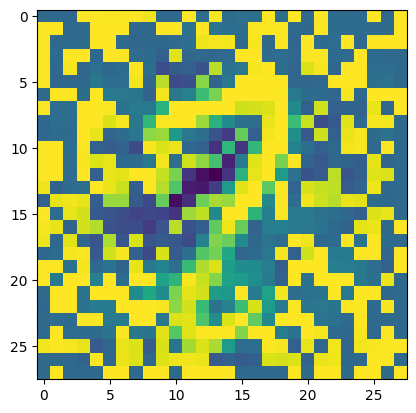

601 iteration and loss 0.8823896646499634
602 iteration and loss 0.8823902606964111
603 iteration and loss 0.8822460770606995
604 iteration and loss 0.8819833397865295
605 iteration and loss 0.8818711638450623
606 iteration and loss 0.8817565441131592
607 iteration and loss 0.8816671371459961
608 iteration and loss 0.8815047740936279
609 iteration and loss 0.8813679814338684
610 iteration and loss 0.8813024163246155
611 iteration and loss 0.8809847831726074
612 iteration and loss 0.8808885216712952
613 iteration and loss 0.880760908126831
614 iteration and loss 0.88062584400177
615 iteration and loss 0.8805038332939148
616 iteration and loss 0.8803950548171997
617 iteration and loss 0.8801426291465759
618 iteration and loss 0.8800694942474365
619 iteration and loss 0.8800435662269592
620 iteration and loss 0.8797991275787354
621 iteration and loss 0.8795951008796692
622 iteration and loss 0.8794683218002319
623 iteration and loss 0.879328727722168
624 iteration and loss 0.8792288303375

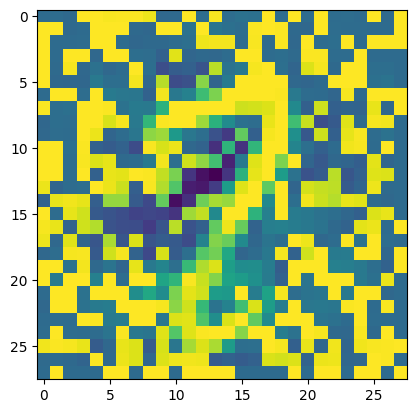

651 iteration and loss 0.8759702444076538
652 iteration and loss 0.8758139610290527
653 iteration and loss 0.8758127093315125
654 iteration and loss 0.8755991458892822
655 iteration and loss 0.8755054473876953
656 iteration and loss 0.8754799962043762
657 iteration and loss 0.875322699546814
658 iteration and loss 0.8750890493392944
659 iteration and loss 0.875046968460083
660 iteration and loss 0.8749880790710449
661 iteration and loss 0.8749696612358093
662 iteration and loss 0.8746703863143921
663 iteration and loss 0.8745831847190857
664 iteration and loss 0.8745136857032776
665 iteration and loss 0.8744887709617615
666 iteration and loss 0.874365508556366
667 iteration and loss 0.8741686940193176
668 iteration and loss 0.8740656971931458
669 iteration and loss 0.8740144968032837
670 iteration and loss 0.8739751577377319
671 iteration and loss 0.8739259243011475
672 iteration and loss 0.8737921118736267
673 iteration and loss 0.8735893368721008
674 iteration and loss 0.873403191566

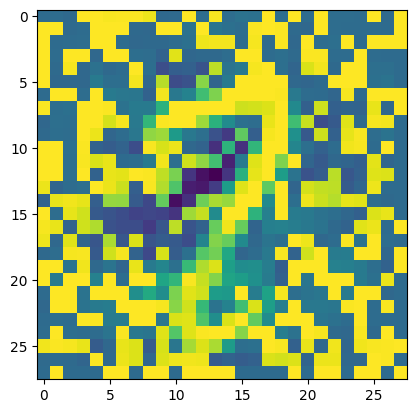

701 iteration and loss 0.8710429668426514
702 iteration and loss 0.8708630800247192
703 iteration and loss 0.8708463311195374
704 iteration and loss 0.8707712888717651
705 iteration and loss 0.8707028031349182
706 iteration and loss 0.8705418705940247
707 iteration and loss 0.8705162405967712
708 iteration and loss 0.8703480362892151
709 iteration and loss 0.8703002333641052
710 iteration and loss 0.8702242970466614
711 iteration and loss 0.8701700568199158
712 iteration and loss 0.8700182437896729
713 iteration and loss 0.869904100894928
714 iteration and loss 0.8699299097061157
715 iteration and loss 0.8698803186416626
716 iteration and loss 0.8698573112487793
717 iteration and loss 0.8696297407150269
718 iteration and loss 0.8694968223571777
719 iteration and loss 0.8694545030593872
720 iteration and loss 0.8693585991859436
721 iteration and loss 0.8692877888679504
722 iteration and loss 0.8691924214363098
723 iteration and loss 0.8691089749336243
724 iteration and loss 0.8690304756

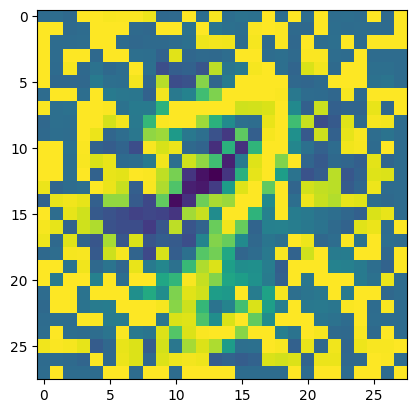

751 iteration and loss 0.8669385313987732
752 iteration and loss 0.8668444156646729
753 iteration and loss 0.8666845560073853
754 iteration and loss 0.8666877150535583
755 iteration and loss 0.866688072681427
756 iteration and loss 0.8665215969085693
757 iteration and loss 0.8664964437484741
758 iteration and loss 0.8664292097091675
759 iteration and loss 0.8663355112075806
760 iteration and loss 0.8662301898002625
761 iteration and loss 0.8662109375
762 iteration and loss 0.8661248683929443
763 iteration and loss 0.8660472631454468
764 iteration and loss 0.8659743666648865
765 iteration and loss 0.8659629225730896
766 iteration and loss 0.8659039735794067
767 iteration and loss 0.8658036589622498
768 iteration and loss 0.8657310605049133
769 iteration and loss 0.8656633496284485
770 iteration and loss 0.8656094670295715
771 iteration and loss 0.8654595017433167
772 iteration and loss 0.865372896194458
773 iteration and loss 0.8653650283813477
774 iteration and loss 0.865294337272644
7

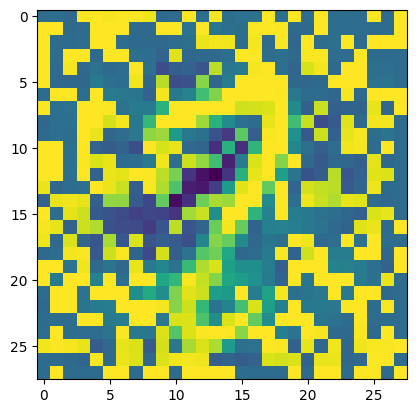

801 iteration and loss 0.8632569313049316
802 iteration and loss 0.863185465335846
803 iteration and loss 0.8631298542022705
804 iteration and loss 0.863059401512146
805 iteration and loss 0.8630236387252808
806 iteration and loss 0.8629127740859985
807 iteration and loss 0.862887442111969
808 iteration and loss 0.8628584146499634
809 iteration and loss 0.8628040552139282
810 iteration and loss 0.8627290725708008
811 iteration and loss 0.8626000285148621
812 iteration and loss 0.8625370264053345
813 iteration and loss 0.86243736743927
814 iteration and loss 0.8623798489570618
815 iteration and loss 0.8622828722000122
816 iteration and loss 0.8621991872787476
817 iteration and loss 0.8621042966842651
818 iteration and loss 0.8620113134384155
819 iteration and loss 0.8619987964630127
820 iteration and loss 0.8619789481163025
821 iteration and loss 0.8619281053543091
822 iteration and loss 0.8618559241294861
823 iteration and loss 0.861664354801178
824 iteration and loss 0.861660599708557

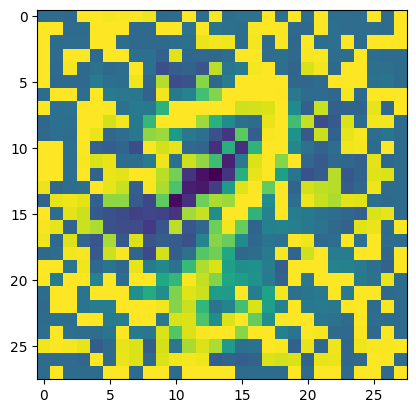

851 iteration and loss 0.8598964810371399
852 iteration and loss 0.8598267436027527
853 iteration and loss 0.8598414659500122
854 iteration and loss 0.8597918152809143
855 iteration and loss 0.8596104383468628
856 iteration and loss 0.8596176505088806
857 iteration and loss 0.859571635723114
858 iteration and loss 0.8595226407051086
859 iteration and loss 0.8593719005584717
860 iteration and loss 0.8592570424079895
861 iteration and loss 0.8592670559883118
862 iteration and loss 0.8592116236686707
863 iteration and loss 0.8591817021369934
864 iteration and loss 0.8591277599334717
865 iteration and loss 0.8590649366378784
866 iteration and loss 0.8590453267097473
867 iteration and loss 0.8590072989463806
868 iteration and loss 0.8589364886283875
869 iteration and loss 0.8588279485702515
870 iteration and loss 0.8587485551834106
871 iteration and loss 0.8586829900741577
872 iteration and loss 0.8586147427558899
873 iteration and loss 0.8584809303283691
874 iteration and loss 0.8585140109

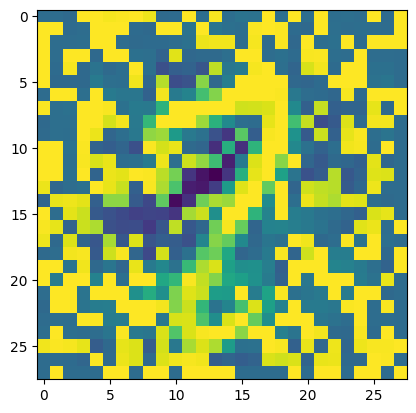

901 iteration and loss 0.8568861484527588
902 iteration and loss 0.8568127155303955
903 iteration and loss 0.8567987084388733
904 iteration and loss 0.856715738773346
905 iteration and loss 0.8566067814826965
906 iteration and loss 0.8564607501029968
907 iteration and loss 0.8564673662185669
908 iteration and loss 0.8563851714134216
909 iteration and loss 0.8563811182975769
910 iteration and loss 0.8563002943992615
911 iteration and loss 0.8562913537025452
912 iteration and loss 0.8562865853309631
913 iteration and loss 0.8562721610069275
914 iteration and loss 0.8562106490135193
915 iteration and loss 0.8561504483222961
916 iteration and loss 0.8560025095939636
917 iteration and loss 0.8559572100639343
918 iteration and loss 0.8558729290962219
919 iteration and loss 0.8557931184768677
920 iteration and loss 0.8557258248329163
921 iteration and loss 0.8556274175643921
922 iteration and loss 0.8556295037269592
923 iteration and loss 0.8555868864059448
924 iteration and loss 0.8555406332

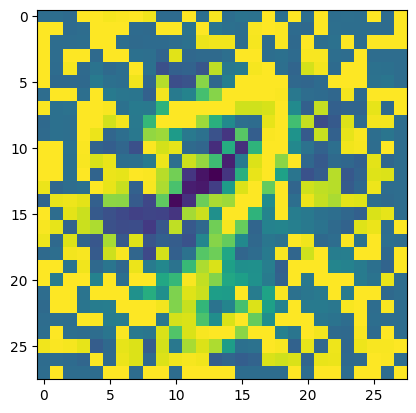

951 iteration and loss 0.8537836670875549
952 iteration and loss 0.8537529110908508
953 iteration and loss 0.8537167906761169
954 iteration and loss 0.853701114654541
955 iteration and loss 0.8535633087158203
956 iteration and loss 0.8535647392272949
957 iteration and loss 0.8534806370735168
958 iteration and loss 0.8534560203552246
959 iteration and loss 0.8533358573913574
960 iteration and loss 0.8533536791801453
961 iteration and loss 0.853282630443573
962 iteration and loss 0.8532683253288269
963 iteration and loss 0.8531361222267151
964 iteration and loss 0.8531683683395386
965 iteration and loss 0.8530285954475403
966 iteration and loss 0.8529195785522461
967 iteration and loss 0.8528778553009033
968 iteration and loss 0.8527835011482239
969 iteration and loss 0.8528076410293579
970 iteration and loss 0.8527927994728088
971 iteration and loss 0.8527402281761169
972 iteration and loss 0.8526614904403687
973 iteration and loss 0.8525322079658508
974 iteration and loss 0.85251581668

In [336]:
final_image_new_noise = minimize_error(added_noise,new_target_label,num_iterations= 1000,learning_rate=0.01)

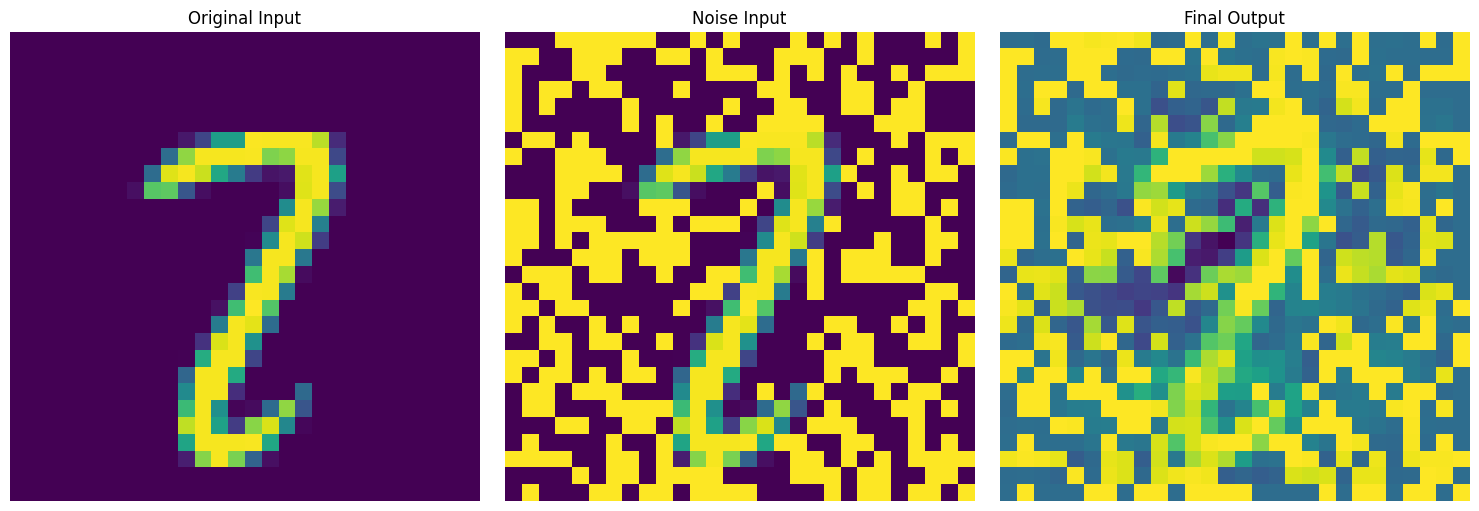

In [337]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(test_x[30])
ax1.set_title('Original Input')
ax1.axis('off')
ax2.imshow(added_noise.squeeze())
ax2.set_title('Noise Input')
ax2.axis('off')
ax3.imshow(final_image_new_noise.squeeze())
ax3.set_title('Final Output')
ax3.axis('off')
plt.tight_layout()
plt.show()

In [338]:
output = custom_model(final_image_new_noise)
print(np.argmax(output))


2


# Discussion

In the course of this work, I drew inspiration and insights from blogs provided by TensorFlow and lessons presented during the learning process. These resources specifically emphasized the intricate learning patterns of Convolutional Neural Networks (CNNs) at each layer. The approach involved extracting a layer from a pre-trained CNN model and applying gradient calculations on this specific layer. Their work yielded meaningful results, which I sought to contrast with the outcomes of my own work.

It is important to note that the references for this work include the aforementioned TensorFlow blog and lessons, providing valuable perspectives on how CNNs learn at different layers. By incorporating and comparing these insights with my experimental outcomes, I aimed to enrich the understanding of the model's behavior in response to various manipulations and optimizations.

* https://keras.io/examples/vision/visualizing_what_convnets_learn/
* https://distill.pub/2017/feature-visualization/
* https://ai.stackexchange.com/questions/15544/how-can-we-find-find-the-input-image-which-maximizes-the-class-probability-for-a
* https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec14.pdf 